# TME 9: Merge
> Consignes: le fichier TME8_Sujet.ipynb est à déposer sur le site Moodle de l'UE https://moodle-sciences.upmc.fr/moodle-2018/course/view.php?id=4650. Si vous êtes en binôme, renommez-le en TME8_nom1_nom2.ipynb.

N'oubliez pas de sauvegarder fréquemment votre notebook !!

## Données et codes utiles au TME

In [1]:
from PIL import Image
from pylab import *
import math

### Données
img_test = full((64,64),150,dtype=uint8)
img_test[32:48,16:16+32] = 100
img_test[8:24,40:56] = 50
angio = array(Image.open('images/angiogra.png'))
cam = array(Image.open('images/cameraman.png'))
muscle = array(Image.open('images/muscle.png'))
prisme = array(Image.open('images/prisme.png'))
seiche = array(Image.open('images/seiche.png'))

### Fonction d'affichage
def affichage_14(affichages,titres=None):
    """ list[Array]*list[str] -> NoneType
    Dffectue entre 1 et 4 affichages avec leurs titres, pour des images ou courbes
    
    Paramètres :
      - liste des affichages (entre 1 et 4)
      - liste des titres (entre 1 et 4, autant que de affichages), optionnelle    
    """
    
    if not type(affichages) == type([]):
        affichages = [affichages]
        
    if titres is None:
        titres = ['',]*len(affichages)
        
    if not type(titres) == type([]):
        titres = [titres]
    
    nb_affichages = len(affichages)
    if nb_affichages >4 or nb_affichages < 1 :
        raise ValueError('affichage_14 nécéssite 1 à 4 entrées en paramètre')        
        
    if nb_affichages != len(titres):
        raise ValueError('affichage_14 nécéssite autant de titres que d\'affichages')
        
    courbes = False
    for i in range(0,nb_affichages):
        s = subplot(101+10*nb_affichages+i)
        s.set_title(titres[i])
        if len(affichages[i].shape)==2 and affichages[i].shape[0] > 1 and affichages[i].shape[1] > 1:
            # on affiche une image
            s.imshow(affichages[i], cmap="gray",interpolation='nearest', aspect='equal')
        else :
            # il s'agit d'une seule ligne, à afficher comme une courbe
            plot(affichages[i])
            courbes=True

    agrandissement_h = nb_affichages
    agrandissement_v = nb_affichages*2 if courbes else nb_affichages
    params = gcf()
    plSize = params.get_size_inches()
    params.set_size_inches( (plSize[0]*agrandissement_v, plSize[1]*agrandissement_h) )
    show()



Recopier ci-dessous le code des fonctions ``split()``, ``predsplit1()`` et ``splitprof()``
écrites au TME 8:

In [2]:
def split(I,reg,pred,*args):
    """ Array*Bloc*(Array*Bloc*...->bool)*... -> 4-aire
        Découpage de I en arbre 4-aire sur un critère d'écart-type minimal
    """
    x,y,n,m = reg
    if(pred(I,reg,*args) and n >2 and m > 2):
        NO = split(I,(x,y,n//2, m//2), pred, *args)
        NE = split(I,(x,y+m//2,n//2, m//2), pred, *args)
        SO = split(I,(x+n//2,y,n//2, m//2), pred, *args)
        SE = split(I,(x+n//2,y+m//2,n//2, m//2), pred, *args)
        return [NO, NE, SO, SE]
    else :
        return [reg]


def predsplit1(I,reg,*args):
    """ Array*Bloc*... -> bool
    """ 
    x, y, n, m = reg
    return I[x:x+n,y:y+m].std() > args[0]

def splitprof(L,li):
    """ 4-aire -> list[Bloc]"""
    if (type(L) is tuple):
        print("coord", L)
        li.append(L)
        return L, li
        #x,y,n,m = L[0]
        #print(L[x:x+n, y:y+m].mean())
        #print(L[x:x+n, y:y+m].std())
    else :
        for l in L :
            splitprof(l,li)


def splitprof__(L):
    """ Retourne la liste des feuilles de L"""
    li =[]
    splitprof(L,li)
    return li
l = split(img_test, (0, 0, 64, 64), predsplit1, 0)
print(splitprof__(l))

coord (0, 0, 32, 32)
coord (0, 32, 8, 8)
coord (0, 40, 8, 8)
coord (8, 32, 8, 8)
coord (8, 40, 8, 8)
coord (0, 48, 8, 8)
coord (0, 56, 8, 8)
coord (8, 48, 8, 8)
coord (8, 56, 8, 8)
coord (16, 32, 8, 8)
coord (16, 40, 8, 8)
coord (24, 32, 8, 8)
coord (24, 40, 8, 8)
coord (16, 48, 8, 8)
coord (16, 56, 8, 8)
coord (24, 48, 8, 8)
coord (24, 56, 8, 8)
coord (32, 0, 16, 16)
coord (32, 16, 16, 16)
coord (48, 0, 16, 16)
coord (48, 16, 16, 16)
coord (32, 32, 16, 16)
coord (32, 48, 16, 16)
coord (48, 32, 16, 16)
coord (48, 48, 16, 16)
[(0, 0, 32, 32), (0, 32, 8, 8), (0, 40, 8, 8), (8, 32, 8, 8), (8, 40, 8, 8), (0, 48, 8, 8), (0, 56, 8, 8), (8, 48, 8, 8), (8, 56, 8, 8), (16, 32, 8, 8), (16, 40, 8, 8), (24, 32, 8, 8), (24, 40, 8, 8), (16, 48, 8, 8), (16, 56, 8, 8), (24, 48, 8, 8), (24, 56, 8, 8), (32, 0, 16, 16), (32, 16, 16, 16), (48, 0, 16, 16), (48, 16, 16, 16), (32, 32, 16, 16), (32, 48, 16, 16), (48, 32, 16, 16), (48, 48, 16, 16)]


## Exercice 1
### Question 1
Modifier la fonction ``splitprof(L)`` pour en faire une fonction ``splitprofstat(L,I)`` qui rend une liste de feuilles de l'arbre 4-aire ``L`` et telle que chaque élément de cette liste, de type ``Bloc``, est enrichi de trois scalaires, le premier étant la taille, le second la moyenne et la troisième la variance des valeurs de pixels du bloc dans l'image ``I``. Cette fonction rend alors une liste dont les éléments ont pour type formel:
```python
type Blocstat = tuple[int**4,int,float**2]
```
Les quatre premières valeurs sont celles du type ``Bloc``, la cinquième est la taille du bloc (en nombre de pixels) et les deux dernières correspondent à la moyenne et la variance calculées sur la région.


In [3]:
# type Blocstat = tuple[int**4,int,float**2]

def splitprofstats(L,I,Li):
    """ 4-aire*Array -> list[Blocstat] """

    if (type(L) is tuple):
        print("coord", L)
        x,y,n,m = L
        moy = I[x:x+n, y:y+m].mean()
        s = I[x:x+n, y:y+m].std()
        t = n*m
        truc = (x,y,n,m,t,moy, s)
        Li.append(truc)
        return L, Li
        #x,y,n,m = L[0]
        #print(L[x:x+n, y:y+m].mean())
        #print(L[x:x+n, y:y+m].std())
    else :
        for l in L :
            splitprofstats(l,I,Li)
            
def splitprofstats__(L,I):
    li =[]
    splitprofstats(L,I, li)
    return li         


print(l)
print(splitprofstats__(l,img_test))

[[(0, 0, 32, 32)], [[[(0, 32, 8, 8)], [(0, 40, 8, 8)], [(8, 32, 8, 8)], [(8, 40, 8, 8)]], [[(0, 48, 8, 8)], [(0, 56, 8, 8)], [(8, 48, 8, 8)], [(8, 56, 8, 8)]], [[(16, 32, 8, 8)], [(16, 40, 8, 8)], [(24, 32, 8, 8)], [(24, 40, 8, 8)]], [[(16, 48, 8, 8)], [(16, 56, 8, 8)], [(24, 48, 8, 8)], [(24, 56, 8, 8)]]], [[(32, 0, 16, 16)], [(32, 16, 16, 16)], [(48, 0, 16, 16)], [(48, 16, 16, 16)]], [[(32, 32, 16, 16)], [(32, 48, 16, 16)], [(48, 32, 16, 16)], [(48, 48, 16, 16)]]]
coord (0, 0, 32, 32)
coord (0, 32, 8, 8)
coord (0, 40, 8, 8)
coord (8, 32, 8, 8)
coord (8, 40, 8, 8)
coord (0, 48, 8, 8)
coord (0, 56, 8, 8)
coord (8, 48, 8, 8)
coord (8, 56, 8, 8)
coord (16, 32, 8, 8)
coord (16, 40, 8, 8)
coord (24, 32, 8, 8)
coord (24, 40, 8, 8)
coord (16, 48, 8, 8)
coord (16, 56, 8, 8)
coord (24, 48, 8, 8)
coord (24, 56, 8, 8)
coord (32, 0, 16, 16)
coord (32, 16, 16, 16)
coord (48, 0, 16, 16)
coord (48, 16, 16, 16)
coord (32, 32, 16, 16)
coord (32, 48, 16, 16)
coord (48, 32, 16, 16)
coord (48, 48, 16, 16

### Question 2
Dans la suite du TME, on considère le type formel:
```python
type Region = list[Blocstat]
```
Une région, comme vu au TME, est donc une liste de blocs. Écrire le prédicat de fusion ``predmerge(b,R,*args)`` vu en TD. Cette fonction retourne ```True``` si le bloc ``b`` doit fusionner dans la région ``R``. Si telle est le cas, alors le premier élément de la liste ``R`` voit ses statistiques modifiées: elles décrivent celles de l'ensemble des blocs de la région ainsi fusionnée.

In [4]:
def predmerge(b,R,*args):
    """ Blocstat*Region*... -> bool 
        Si fusion, R[0] est modifié
    """
    #Retourne vrai si le bloc b doit fusionner dans la region r
    x1, y1, w1, h1, n1, u1, v1 = b
    x2, y2, w2, h2, n2, u2, v2 = R[0]
    n = n1 + n2
    u = (n1*u1 + u2*n2)/n
    v_carre = (n1*v1*v1 + n2*v2*v2 + n1*u1*u1 + n2*u2*u2)/n - u*u
    if ( v_carre < args[0]):
        return True
    return False


### Question 3
Implémenter les fonctions ```estdans()```, ```sontvoisins()```, ```voisins()``` et finalement ```merge()``` vues en TD.

In [5]:
def estdans(x,y,a):
    """ int*int*Blocstat -> bool 
        Teste si (x,y) est dans a 
    """
    
    return ( (x>= a[0]) and (y>= a[1]) and (x<a[0]+a[2]) and (y<a[1]+a[3]) )

def sontvoisins(a,b):
    """ Blocstat**2 -> bool
        Teste si a et b sont voisins
    """
    
    (xA, yA, wA, hA, nA, uA, sA ) = a
    (xB, yB, wB, hB, nB, uB, sB ) = b
    #A doit être le bloc le plus petit.
    if( (wA > wB) and (hA > hB) ):
        (a,b) = (b,a)
    #on calcule le centre de A
    xcentre = xA + (wA//2)
    ycentre = yA + (hA//2)
    #on teste si le symetrique du centre de A par rapport aux 4 bords du bloc A est dans le bloc B.
    return ((estdans((xcentre-wA), ycentre, b)) or (estdans((xcentre+wA), ycentre, b)) or (estdans(xcentre, (ycentre-hA), b)) or (estdans(xcentre, (ycentre+hA), b)))

def voisins(b,K):
    """ Blocstat*list[Blocstat]->list[Blocstat]
        retourne la liste des elements de K voisins de b
    """
    
    N=[]
    for n in K:
        if( sontvoisins(b,n)):
            N.append(n)
    return N

#type Region = list[Blocstat]

def merge(S,I,pred,*args):
    """ 7-aire*Array*(Blocstat*Region*...->bool) -> list[Region]
        Fusionne les feuilles de S en une liste de régions
    """
    # k : liste des blocstat
    k = []
    print(S)
    for (x,y,n,m,t, u,s) in S :
        k.append((x,y,n,m,n*m,I[x:x+n, y:y+m].mean(),I[x:x+n, y:y+m].std()))
    # l : liste des regions
    l = []
    while(len(k) > 0):
        #on enleve le 1er element de k que l'on nomme b.
        b = k[0]
        k=k[1:]
        # r : région contenant initialement 1bloc.
        r = [b]
        #on recupere dans k les voisins de b.
        N = voisins(b,k)
        #on parcours les voisins.
        while(len(N) > 0):
            #on enleve le 1er element de N que le nomme bi.
            bi = N[0]
            N = N[1:]
            #test du predicat de fusion
            if(pred(bi, r, args[0])):
                x2, y2, w2, h2, n2, u2, s2 = r[0]
                x1, y1, w1, h1, n1, u1, s1 = bi
                #MAJ des stats
                u = (n1*u1 + u2*n2)/(n1+n2)
                v_carre = (n1*s1*s1 + n2*s2*s2 + n1*u1*u1 + n2*u2*u2)/(n1+n2) - u*u
                r[0] = x2, y2, w2, h2, n1+n2, u, math.sqrt(abs(v_carre))
                #on enleve le voisin du reste des bloc et le met dans la nouvelle region r
                k.remove(bi)
                r.append(bi)
                #on calcule les voisins du voisin
                for j in voisins(bi, k):
                    #si ce sont de nouveaux voisins on ajoute a la liste des voisins
                    if not j in N :
                        N.append(j)
        #une fois la region constituee on l ajoute a la liste des regions
        l.append(r)
    return l
    

### Question 4
Faire la mise au point des fonctions précédentes à l'aide de l'image ``img_test``.

In [6]:
sp = splitprof__(l)
sps = splitprofstats__(l,img_test)
m = merge(sps,img_test,predmerge,1)
print(m)

coord (0, 0, 32, 32)
coord (0, 32, 8, 8)
coord (0, 40, 8, 8)
coord (8, 32, 8, 8)
coord (8, 40, 8, 8)
coord (0, 48, 8, 8)
coord (0, 56, 8, 8)
coord (8, 48, 8, 8)
coord (8, 56, 8, 8)
coord (16, 32, 8, 8)
coord (16, 40, 8, 8)
coord (24, 32, 8, 8)
coord (24, 40, 8, 8)
coord (16, 48, 8, 8)
coord (16, 56, 8, 8)
coord (24, 48, 8, 8)
coord (24, 56, 8, 8)
coord (32, 0, 16, 16)
coord (32, 16, 16, 16)
coord (48, 0, 16, 16)
coord (48, 16, 16, 16)
coord (32, 32, 16, 16)
coord (32, 48, 16, 16)
coord (48, 32, 16, 16)
coord (48, 48, 16, 16)
coord (0, 0, 32, 32)
coord (0, 32, 8, 8)
coord (0, 40, 8, 8)
coord (8, 32, 8, 8)
coord (8, 40, 8, 8)
coord (0, 48, 8, 8)
coord (0, 56, 8, 8)
coord (8, 48, 8, 8)
coord (8, 56, 8, 8)
coord (16, 32, 8, 8)
coord (16, 40, 8, 8)
coord (24, 32, 8, 8)
coord (24, 40, 8, 8)
coord (16, 48, 8, 8)
coord (16, 56, 8, 8)
coord (24, 48, 8, 8)
coord (24, 56, 8, 8)
coord (32, 0, 16, 16)
coord (32, 16, 16, 16)
coord (48, 0, 16, 16)
coord (48, 16, 16, 16)
coord (32, 32, 16, 16)
coord (

### Question 5
Écrire une fonction ``regions(LR,shape)`` qui prend une liste de régions telle que rendu par la fonction ``merge()`` et rend une image des régions. Chaque région sera colorée avec le niveau de gris correspondant à la moyenne de la région. Le paramètre ``shape`` donne la taille de l'image à produire. Tester la fonction sur l'exemple précédent.

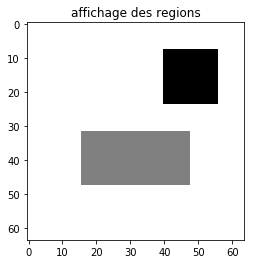

In [7]:
def regions(LR,shape):
    """ list[Region] -> Array """
    #uint8 = unsigned integer (de 0 a 255)
    buf = zeros(shape,dtype=uint8)
    #on parcourt les regions
    for R in LR:
        x,y,n,m,s,mu,v=R[0]
        #on parcourt les blocs
        for b in R:
            x,y,n,m,s,t,v=b
            #on colorie bloc par bloc de la couleur correspondant a la moyenne de la region. 
            buf[x:x+n,y:y+m] = int(mu)
    return buf

affichage_14([regions(m,img_test.shape)],['affichage des regions'])

## Exercice 2: expérimentation
### Question 1:
Tester la fonction ``merge()`` sur les images ``angio``, ``cam``, ``muscle``, ``prisme`` et ``seiche``.

In [8]:
def result(img,ta):
    w,h = img.shape
    l = split(img, (0, 0, w, h), predsplit1, ta)

    sp = splitprof__(l)
    sps = splitprofstats__(l,img)
    m = merge(sps,img,predmerge,1)
    return m


coord (0, 0, 64, 64)
coord (0, 64, 8, 8)
coord (0, 72, 2, 2)
coord (0, 74, 2, 2)
coord (2, 72, 2, 2)
coord (2, 74, 2, 2)
coord (0, 76, 2, 2)
coord (0, 78, 2, 2)
coord (2, 76, 2, 2)
coord (2, 78, 2, 2)
coord (4, 72, 2, 2)
coord (4, 74, 2, 2)
coord (6, 72, 2, 2)
coord (6, 74, 2, 2)
coord (4, 76, 2, 2)
coord (4, 78, 2, 2)
coord (6, 76, 2, 2)
coord (6, 78, 2, 2)
coord (8, 64, 8, 8)
coord (8, 72, 2, 2)
coord (8, 74, 2, 2)
coord (10, 72, 2, 2)
coord (10, 74, 2, 2)
coord (8, 76, 2, 2)
coord (8, 78, 2, 2)
coord (10, 76, 2, 2)
coord (10, 78, 2, 2)
coord (12, 72, 2, 2)
coord (12, 74, 2, 2)
coord (14, 72, 2, 2)
coord (14, 74, 2, 2)
coord (12, 76, 2, 2)
coord (12, 78, 2, 2)
coord (14, 76, 2, 2)
coord (14, 78, 2, 2)
coord (0, 80, 4, 4)
coord (0, 84, 4, 4)
coord (4, 80, 4, 4)
coord (4, 84, 4, 4)
coord (0, 88, 8, 8)
coord (8, 80, 2, 2)
coord (8, 82, 2, 2)
coord (10, 80, 2, 2)
coord (10, 82, 2, 2)
coord (8, 84, 2, 2)
coord (8, 86, 2, 2)
coord (10, 84, 2, 2)
coord (10, 86, 2, 2)
coord (12, 80, 4, 4)
co

coord (132, 106, 2, 2)
coord (134, 104, 2, 2)
coord (134, 106, 2, 2)
coord (132, 108, 4, 4)
coord (136, 96, 4, 4)
coord (136, 100, 4, 4)
coord (140, 96, 2, 2)
coord (140, 98, 2, 2)
coord (142, 96, 2, 2)
coord (142, 98, 2, 2)
coord (140, 100, 4, 4)
coord (136, 104, 4, 4)
coord (136, 108, 2, 2)
coord (136, 110, 2, 2)
coord (138, 108, 2, 2)
coord (138, 110, 2, 2)
coord (140, 104, 2, 2)
coord (140, 106, 2, 2)
coord (142, 104, 2, 2)
coord (142, 106, 2, 2)
coord (140, 108, 4, 4)
coord (128, 112, 4, 4)
coord (128, 116, 4, 4)
coord (132, 112, 4, 4)
coord (132, 116, 4, 4)
coord (128, 120, 4, 4)
coord (128, 124, 4, 4)
coord (132, 120, 4, 4)
coord (132, 124, 2, 2)
coord (132, 126, 2, 2)
coord (134, 124, 2, 2)
coord (134, 126, 2, 2)
coord (136, 112, 8, 8)
coord (136, 120, 8, 8)
coord (144, 96, 2, 2)
coord (144, 98, 2, 2)
coord (146, 96, 2, 2)
coord (146, 98, 2, 2)
coord (144, 100, 2, 2)
coord (144, 102, 2, 2)
coord (146, 100, 2, 2)
coord (146, 102, 2, 2)
coord (148, 96, 2, 2)
coord (148, 98, 2, 2)

coord (56, 76, 2, 2)
coord (56, 78, 2, 2)
coord (58, 76, 2, 2)
coord (58, 78, 2, 2)
coord (60, 72, 4, 4)
coord (60, 76, 2, 2)
coord (60, 78, 2, 2)
coord (62, 76, 2, 2)
coord (62, 78, 2, 2)
coord (48, 80, 8, 8)
coord (48, 88, 8, 8)
coord (56, 80, 8, 8)
coord (56, 88, 8, 8)
coord (32, 96, 32, 32)
coord (64, 0, 32, 32)
coord (64, 32, 8, 8)
coord (64, 40, 4, 4)
coord (64, 44, 4, 4)
coord (68, 40, 2, 2)
coord (68, 42, 2, 2)
coord (70, 40, 2, 2)
coord (70, 42, 2, 2)
coord (68, 44, 4, 4)
coord (72, 32, 4, 4)
coord (72, 36, 2, 2)
coord (72, 38, 2, 2)
coord (74, 36, 2, 2)
coord (74, 38, 2, 2)
coord (76, 32, 4, 4)
coord (76, 36, 2, 2)
coord (76, 38, 2, 2)
coord (78, 36, 2, 2)
coord (78, 38, 2, 2)
coord (72, 40, 2, 2)
coord (72, 42, 2, 2)
coord (74, 40, 2, 2)
coord (74, 42, 2, 2)
coord (72, 44, 2, 2)
coord (72, 46, 2, 2)
coord (74, 44, 2, 2)
coord (74, 46, 2, 2)
coord (76, 40, 2, 2)
coord (76, 42, 2, 2)
coord (78, 40, 2, 2)
coord (78, 42, 2, 2)
coord (76, 44, 2, 2)
coord (76, 46, 2, 2)
coord (78,

coord (20, 200, 4, 4)
coord (20, 204, 4, 4)
coord (24, 192, 8, 8)
coord (24, 200, 4, 4)
coord (24, 204, 4, 4)
coord (28, 200, 4, 4)
coord (28, 204, 4, 4)
coord (16, 208, 8, 8)
coord (16, 216, 8, 8)
coord (24, 208, 8, 8)
coord (24, 216, 4, 4)
coord (24, 220, 4, 4)
coord (28, 216, 4, 4)
coord (28, 220, 4, 4)
coord (0, 224, 32, 32)
coord (32, 192, 32, 32)
coord (32, 224, 32, 32)
coord (64, 128, 8, 8)
coord (64, 136, 4, 4)
coord (64, 140, 2, 2)
coord (64, 142, 2, 2)
coord (66, 140, 2, 2)
coord (66, 142, 2, 2)
coord (68, 136, 4, 4)
coord (68, 140, 2, 2)
coord (68, 142, 2, 2)
coord (70, 140, 2, 2)
coord (70, 142, 2, 2)
coord (72, 128, 8, 8)
coord (72, 136, 8, 8)
coord (64, 144, 2, 2)
coord (64, 146, 2, 2)
coord (66, 144, 2, 2)
coord (66, 146, 2, 2)
coord (64, 148, 4, 4)
coord (68, 144, 4, 4)
coord (68, 148, 4, 4)
coord (64, 152, 8, 8)
coord (72, 144, 8, 8)
coord (72, 152, 8, 8)
coord (80, 128, 16, 16)
coord (80, 144, 16, 16)
coord (64, 160, 32, 32)
coord (96, 128, 8, 8)
coord (96, 136, 8, 8)

coord (220, 244, 4, 4)
coord (216, 248, 8, 8)
coord (224, 192, 32, 32)
coord (224, 224, 8, 8)
coord (224, 232, 4, 4)
coord (224, 236, 4, 4)
coord (228, 232, 4, 4)
coord (228, 236, 4, 4)
coord (232, 224, 8, 8)
coord (232, 232, 4, 4)
coord (232, 236, 2, 2)
coord (232, 238, 2, 2)
coord (234, 236, 2, 2)
coord (234, 238, 2, 2)
coord (236, 232, 4, 4)
coord (236, 236, 2, 2)
coord (236, 238, 2, 2)
coord (238, 236, 2, 2)
coord (238, 238, 2, 2)
coord (224, 240, 4, 4)
coord (224, 244, 4, 4)
coord (228, 240, 4, 4)
coord (228, 244, 4, 4)
coord (224, 248, 4, 4)
coord (224, 252, 4, 4)
coord (228, 248, 4, 4)
coord (228, 252, 4, 4)
coord (232, 240, 8, 8)
coord (232, 248, 4, 4)
coord (232, 252, 4, 4)
coord (236, 248, 4, 4)
coord (236, 252, 4, 4)
coord (240, 224, 16, 16)
coord (240, 240, 2, 2)
coord (240, 242, 2, 2)
coord (242, 240, 2, 2)
coord (242, 242, 2, 2)
coord (240, 244, 4, 4)
coord (244, 240, 2, 2)
coord (244, 242, 2, 2)
coord (246, 240, 2, 2)
coord (246, 242, 2, 2)
coord (244, 244, 4, 4)
coord (

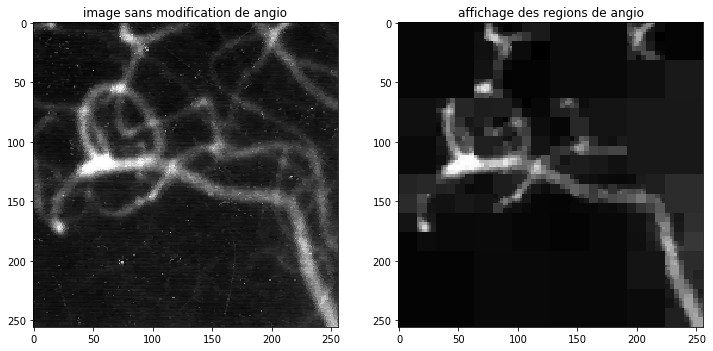

In [9]:
#Image angio
m_angio = result(angio,20)

affichage_14([angio,regions(m_angio,angio.shape)],['image sans modification de angio','affichage des regions de angio'])

coord (0, 0, 64, 64)
coord (0, 64, 32, 32)
coord (0, 96, 32, 32)
coord (32, 64, 32, 32)
coord (32, 96, 8, 8)
coord (32, 104, 4, 4)
coord (32, 108, 4, 4)
coord (36, 104, 2, 2)
coord (36, 106, 2, 2)
coord (38, 104, 2, 2)
coord (38, 106, 2, 2)
coord (36, 108, 2, 2)
coord (36, 110, 2, 2)
coord (38, 108, 2, 2)
coord (38, 110, 2, 2)
coord (40, 96, 4, 4)
coord (40, 100, 2, 2)
coord (40, 102, 2, 2)
coord (42, 100, 2, 2)
coord (42, 102, 2, 2)
coord (44, 96, 2, 2)
coord (44, 98, 2, 2)
coord (46, 96, 2, 2)
coord (46, 98, 2, 2)
coord (44, 100, 2, 2)
coord (44, 102, 2, 2)
coord (46, 100, 2, 2)
coord (46, 102, 2, 2)
coord (40, 104, 8, 8)
coord (32, 112, 4, 4)
coord (32, 116, 4, 4)
coord (36, 112, 2, 2)
coord (36, 114, 2, 2)
coord (38, 112, 2, 2)
coord (38, 114, 2, 2)
coord (36, 116, 2, 2)
coord (36, 118, 2, 2)
coord (38, 116, 2, 2)
coord (38, 118, 2, 2)
coord (32, 120, 4, 4)
coord (32, 124, 4, 4)
coord (36, 120, 2, 2)
coord (36, 122, 2, 2)
coord (38, 120, 2, 2)
coord (38, 122, 2, 2)
coord (36, 124, 

coord (80, 146, 2, 2)
coord (82, 144, 2, 2)
coord (82, 146, 2, 2)
coord (80, 148, 4, 4)
coord (84, 144, 2, 2)
coord (84, 146, 2, 2)
coord (86, 144, 2, 2)
coord (86, 146, 2, 2)
coord (84, 148, 4, 4)
coord (80, 152, 2, 2)
coord (80, 154, 2, 2)
coord (82, 152, 2, 2)
coord (82, 154, 2, 2)
coord (80, 156, 4, 4)
coord (84, 152, 4, 4)
coord (84, 156, 2, 2)
coord (84, 158, 2, 2)
coord (86, 156, 2, 2)
coord (86, 158, 2, 2)
coord (88, 144, 2, 2)
coord (88, 146, 2, 2)
coord (90, 144, 2, 2)
coord (90, 146, 2, 2)
coord (88, 148, 2, 2)
coord (88, 150, 2, 2)
coord (90, 148, 2, 2)
coord (90, 150, 2, 2)
coord (92, 144, 2, 2)
coord (92, 146, 2, 2)
coord (94, 144, 2, 2)
coord (94, 146, 2, 2)
coord (92, 148, 2, 2)
coord (92, 150, 2, 2)
coord (94, 148, 2, 2)
coord (94, 150, 2, 2)
coord (88, 152, 4, 4)
coord (88, 156, 4, 4)
coord (92, 152, 2, 2)
coord (92, 154, 2, 2)
coord (94, 152, 2, 2)
coord (94, 154, 2, 2)
coord (92, 156, 4, 4)
coord (64, 160, 2, 2)
coord (64, 162, 2, 2)
coord (66, 160, 2, 2)
coord (66,

coord (132, 114, 2, 2)
coord (134, 112, 2, 2)
coord (134, 114, 2, 2)
coord (132, 116, 2, 2)
coord (132, 118, 2, 2)
coord (134, 116, 2, 2)
coord (134, 118, 2, 2)
coord (128, 120, 4, 4)
coord (128, 124, 2, 2)
coord (128, 126, 2, 2)
coord (130, 124, 2, 2)
coord (130, 126, 2, 2)
coord (132, 120, 4, 4)
coord (132, 124, 2, 2)
coord (132, 126, 2, 2)
coord (134, 124, 2, 2)
coord (134, 126, 2, 2)
coord (136, 112, 8, 8)
coord (136, 120, 2, 2)
coord (136, 122, 2, 2)
coord (138, 120, 2, 2)
coord (138, 122, 2, 2)
coord (136, 124, 2, 2)
coord (136, 126, 2, 2)
coord (138, 124, 2, 2)
coord (138, 126, 2, 2)
coord (140, 120, 4, 4)
coord (140, 124, 2, 2)
coord (140, 126, 2, 2)
coord (142, 124, 2, 2)
coord (142, 126, 2, 2)
coord (144, 96, 8, 8)
coord (144, 104, 4, 4)
coord (144, 108, 2, 2)
coord (144, 110, 2, 2)
coord (146, 108, 2, 2)
coord (146, 110, 2, 2)
coord (148, 104, 2, 2)
coord (148, 106, 2, 2)
coord (150, 104, 2, 2)
coord (150, 106, 2, 2)
coord (148, 108, 4, 4)
coord (152, 96, 8, 8)
coord (152, 1

coord (236, 106, 2, 2)
coord (238, 104, 2, 2)
coord (238, 106, 2, 2)
coord (236, 108, 2, 2)
coord (236, 110, 2, 2)
coord (238, 108, 2, 2)
coord (238, 110, 2, 2)
coord (224, 112, 16, 16)
coord (240, 96, 2, 2)
coord (240, 98, 2, 2)
coord (242, 96, 2, 2)
coord (242, 98, 2, 2)
coord (240, 100, 2, 2)
coord (240, 102, 2, 2)
coord (242, 100, 2, 2)
coord (242, 102, 2, 2)
coord (244, 96, 2, 2)
coord (244, 98, 2, 2)
coord (246, 96, 2, 2)
coord (246, 98, 2, 2)
coord (244, 100, 2, 2)
coord (244, 102, 2, 2)
coord (246, 100, 2, 2)
coord (246, 102, 2, 2)
coord (240, 104, 2, 2)
coord (240, 106, 2, 2)
coord (242, 104, 2, 2)
coord (242, 106, 2, 2)
coord (240, 108, 4, 4)
coord (244, 104, 2, 2)
coord (244, 106, 2, 2)
coord (246, 104, 2, 2)
coord (246, 106, 2, 2)
coord (244, 108, 4, 4)
coord (248, 96, 2, 2)
coord (248, 98, 2, 2)
coord (250, 96, 2, 2)
coord (250, 98, 2, 2)
coord (248, 100, 2, 2)
coord (248, 102, 2, 2)
coord (250, 100, 2, 2)
coord (250, 102, 2, 2)
coord (252, 96, 2, 2)
coord (252, 98, 2, 2)


coord (192, 134, 2, 2)
coord (194, 132, 2, 2)
coord (194, 134, 2, 2)
coord (196, 128, 2, 2)
coord (196, 130, 2, 2)
coord (198, 128, 2, 2)
coord (198, 130, 2, 2)
coord (196, 132, 2, 2)
coord (196, 134, 2, 2)
coord (198, 132, 2, 2)
coord (198, 134, 2, 2)
coord (192, 136, 8, 8)
coord (200, 128, 8, 8)
coord (200, 136, 8, 8)
coord (192, 144, 16, 16)
coord (208, 128, 16, 16)
coord (208, 144, 16, 16)
coord (192, 160, 2, 2)
coord (192, 162, 2, 2)
coord (194, 160, 2, 2)
coord (194, 162, 2, 2)
coord (192, 164, 2, 2)
coord (192, 166, 2, 2)
coord (194, 164, 2, 2)
coord (194, 166, 2, 2)
coord (196, 160, 4, 4)
coord (196, 164, 2, 2)
coord (196, 166, 2, 2)
coord (198, 164, 2, 2)
coord (198, 166, 2, 2)
coord (192, 168, 4, 4)
coord (192, 172, 2, 2)
coord (192, 174, 2, 2)
coord (194, 172, 2, 2)
coord (194, 174, 2, 2)
coord (196, 168, 2, 2)
coord (196, 170, 2, 2)
coord (198, 168, 2, 2)
coord (198, 170, 2, 2)
coord (196, 172, 2, 2)
coord (196, 174, 2, 2)
coord (198, 172, 2, 2)
coord (198, 174, 2, 2)
coord

coord (66, 90, 2, 2)
coord (64, 92, 2, 2)
coord (64, 94, 2, 2)
coord (66, 92, 2, 2)
coord (66, 94, 2, 2)
coord (68, 88, 4, 4)
coord (68, 92, 4, 4)
coord (72, 80, 8, 8)
coord (72, 88, 8, 8)
coord (80, 64, 16, 16)
coord (80, 80, 16, 16)
coord (64, 96, 4, 4)
coord (64, 100, 2, 2)
coord (64, 102, 2, 2)
coord (66, 100, 2, 2)
coord (66, 102, 2, 2)
coord (68, 96, 2, 2)
coord (68, 98, 2, 2)
coord (70, 96, 2, 2)
coord (70, 98, 2, 2)
coord (68, 100, 2, 2)
coord (68, 102, 2, 2)
coord (70, 100, 2, 2)
coord (70, 102, 2, 2)
coord (64, 104, 4, 4)
coord (64, 108, 2, 2)
coord (64, 110, 2, 2)
coord (66, 108, 2, 2)
coord (66, 110, 2, 2)
coord (68, 104, 2, 2)
coord (68, 106, 2, 2)
coord (70, 104, 2, 2)
coord (70, 106, 2, 2)
coord (68, 108, 4, 4)
coord (72, 96, 2, 2)
coord (72, 98, 2, 2)
coord (74, 96, 2, 2)
coord (74, 98, 2, 2)
coord (72, 100, 2, 2)
coord (72, 102, 2, 2)
coord (74, 100, 2, 2)
coord (74, 102, 2, 2)
coord (76, 96, 4, 4)
coord (76, 100, 2, 2)
coord (76, 102, 2, 2)
coord (78, 100, 2, 2)
coord

coord (90, 144, 2, 2)
coord (90, 146, 2, 2)
coord (88, 148, 2, 2)
coord (88, 150, 2, 2)
coord (90, 148, 2, 2)
coord (90, 150, 2, 2)
coord (92, 144, 2, 2)
coord (92, 146, 2, 2)
coord (94, 144, 2, 2)
coord (94, 146, 2, 2)
coord (92, 148, 2, 2)
coord (92, 150, 2, 2)
coord (94, 148, 2, 2)
coord (94, 150, 2, 2)
coord (88, 152, 4, 4)
coord (88, 156, 4, 4)
coord (92, 152, 2, 2)
coord (92, 154, 2, 2)
coord (94, 152, 2, 2)
coord (94, 154, 2, 2)
coord (92, 156, 4, 4)
coord (64, 160, 2, 2)
coord (64, 162, 2, 2)
coord (66, 160, 2, 2)
coord (66, 162, 2, 2)
coord (64, 164, 4, 4)
coord (68, 160, 2, 2)
coord (68, 162, 2, 2)
coord (70, 160, 2, 2)
coord (70, 162, 2, 2)
coord (68, 164, 4, 4)
coord (64, 168, 8, 8)
coord (72, 160, 2, 2)
coord (72, 162, 2, 2)
coord (74, 160, 2, 2)
coord (74, 162, 2, 2)
coord (72, 164, 2, 2)
coord (72, 166, 2, 2)
coord (74, 164, 2, 2)
coord (74, 166, 2, 2)
coord (76, 160, 2, 2)
coord (76, 162, 2, 2)
coord (78, 160, 2, 2)
coord (78, 162, 2, 2)
coord (76, 164, 2, 2)
coord (76,

coord (146, 126, 2, 2)
coord (148, 120, 2, 2)
coord (148, 122, 2, 2)
coord (150, 120, 2, 2)
coord (150, 122, 2, 2)
coord (148, 124, 2, 2)
coord (148, 126, 2, 2)
coord (150, 124, 2, 2)
coord (150, 126, 2, 2)
coord (152, 112, 4, 4)
coord (152, 116, 2, 2)
coord (152, 118, 2, 2)
coord (154, 116, 2, 2)
coord (154, 118, 2, 2)
coord (156, 112, 2, 2)
coord (156, 114, 2, 2)
coord (158, 112, 2, 2)
coord (158, 114, 2, 2)
coord (156, 116, 2, 2)
coord (156, 118, 2, 2)
coord (158, 116, 2, 2)
coord (158, 118, 2, 2)
coord (152, 120, 2, 2)
coord (152, 122, 2, 2)
coord (154, 120, 2, 2)
coord (154, 122, 2, 2)
coord (152, 124, 2, 2)
coord (152, 126, 2, 2)
coord (154, 124, 2, 2)
coord (154, 126, 2, 2)
coord (156, 120, 2, 2)
coord (156, 122, 2, 2)
coord (158, 120, 2, 2)
coord (158, 122, 2, 2)
coord (156, 124, 2, 2)
coord (156, 126, 2, 2)
coord (158, 124, 2, 2)
coord (158, 126, 2, 2)
coord (160, 64, 32, 32)
coord (160, 96, 4, 4)
coord (160, 100, 2, 2)
coord (160, 102, 2, 2)
coord (162, 100, 2, 2)
coord (162,

coord (214, 116, 2, 2)
coord (214, 118, 2, 2)
coord (208, 120, 8, 8)
coord (216, 112, 2, 2)
coord (216, 114, 2, 2)
coord (218, 112, 2, 2)
coord (218, 114, 2, 2)
coord (216, 116, 2, 2)
coord (216, 118, 2, 2)
coord (218, 116, 2, 2)
coord (218, 118, 2, 2)
coord (220, 112, 4, 4)
coord (220, 116, 4, 4)
coord (216, 120, 8, 8)
coord (224, 64, 16, 16)
coord (224, 80, 4, 4)
coord (224, 84, 2, 2)
coord (224, 86, 2, 2)
coord (226, 84, 2, 2)
coord (226, 86, 2, 2)
coord (228, 80, 4, 4)
coord (228, 84, 4, 4)
coord (224, 88, 8, 8)
coord (232, 80, 2, 2)
coord (232, 82, 2, 2)
coord (234, 80, 2, 2)
coord (234, 82, 2, 2)
coord (232, 84, 4, 4)
coord (236, 80, 2, 2)
coord (236, 82, 2, 2)
coord (238, 80, 2, 2)
coord (238, 82, 2, 2)
coord (236, 84, 4, 4)
coord (232, 88, 8, 8)
coord (240, 64, 8, 8)
coord (240, 72, 4, 4)
coord (240, 76, 4, 4)
coord (244, 72, 4, 4)
coord (244, 76, 2, 2)
coord (244, 78, 2, 2)
coord (246, 76, 2, 2)
coord (246, 78, 2, 2)
coord (248, 64, 2, 2)
coord (248, 66, 2, 2)
coord (250, 64, 

coord (168, 158, 2, 2)
coord (170, 156, 2, 2)
coord (170, 158, 2, 2)
coord (172, 152, 4, 4)
coord (172, 156, 4, 4)
coord (176, 128, 2, 2)
coord (176, 130, 2, 2)
coord (178, 128, 2, 2)
coord (178, 130, 2, 2)
coord (176, 132, 2, 2)
coord (176, 134, 2, 2)
coord (178, 132, 2, 2)
coord (178, 134, 2, 2)
coord (180, 128, 2, 2)
coord (180, 130, 2, 2)
coord (182, 128, 2, 2)
coord (182, 130, 2, 2)
coord (180, 132, 2, 2)
coord (180, 134, 2, 2)
coord (182, 132, 2, 2)
coord (182, 134, 2, 2)
coord (176, 136, 8, 8)
coord (184, 128, 2, 2)
coord (184, 130, 2, 2)
coord (186, 128, 2, 2)
coord (186, 130, 2, 2)
coord (184, 132, 2, 2)
coord (184, 134, 2, 2)
coord (186, 132, 2, 2)
coord (186, 134, 2, 2)
coord (188, 128, 2, 2)
coord (188, 130, 2, 2)
coord (190, 128, 2, 2)
coord (190, 130, 2, 2)
coord (188, 132, 2, 2)
coord (188, 134, 2, 2)
coord (190, 132, 2, 2)
coord (190, 134, 2, 2)
coord (184, 136, 8, 8)
coord (176, 144, 2, 2)
coord (176, 146, 2, 2)
coord (178, 144, 2, 2)
coord (178, 146, 2, 2)
coord (176,

coord (252, 202, 2, 2)
coord (254, 200, 2, 2)
coord (254, 202, 2, 2)
coord (252, 204, 2, 2)
coord (252, 206, 2, 2)
coord (254, 204, 2, 2)
coord (254, 206, 2, 2)
coord (240, 208, 16, 16)
coord (224, 224, 32, 32)
[(0, 0, 64, 64, 4096, 167.382080078125, 6.85926901750653), (0, 64, 32, 32, 1024, 177.9560546875, 3.374569194283809), (0, 96, 32, 32, 1024, 184.7099609375, 2.8195845491355853), (32, 64, 32, 32, 1024, 179.81640625, 14.05240903137113), (32, 96, 8, 8, 64, 184.46875, 14.45247464753009), (32, 104, 4, 4, 16, 186.5625, 1.9990231989649345), (32, 108, 4, 4, 16, 189.25, 3.112474899497183), (36, 104, 2, 2, 4, 188.25, 2.384848003542364), (36, 106, 2, 2, 4, 174.75, 15.990231392947383), (38, 104, 2, 2, 4, 78.5, 61.1657583947097), (38, 106, 2, 2, 4, 29.0, 11.811011811017716), (36, 108, 2, 2, 4, 135.75, 69.72938763534354), (36, 110, 2, 2, 4, 100.5, 86.01889327351289), (38, 108, 2, 2, 4, 13.5, 2.598076211353316), (38, 110, 2, 2, 4, 10.0, 0.0), (40, 96, 4, 4, 16, 185.4375, 4.329675940529499), (40,

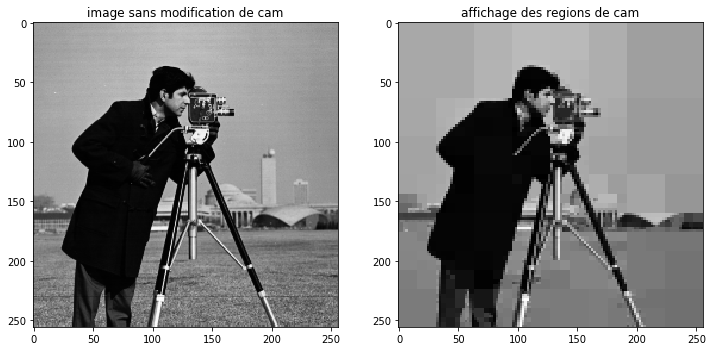

In [10]:
#Image cam

m_cam = result(cam,20)
affichage_14([cam,regions(m_cam,cam.shape)],['image sans modification de cam','affichage des regions de cam'])



coord (0, 0, 32, 32)
coord (0, 32, 16, 16)
coord (0, 48, 16, 16)
coord (16, 32, 16, 16)
coord (16, 48, 8, 8)
coord (16, 56, 2, 2)
coord (16, 58, 2, 2)
coord (18, 56, 2, 2)
coord (18, 58, 2, 2)
coord (16, 60, 2, 2)
coord (16, 62, 2, 2)
coord (18, 60, 2, 2)
coord (18, 62, 2, 2)
coord (20, 56, 2, 2)
coord (20, 58, 2, 2)
coord (22, 56, 2, 2)
coord (22, 58, 2, 2)
coord (20, 60, 4, 4)
coord (24, 48, 8, 8)
coord (24, 56, 2, 2)
coord (24, 58, 2, 2)
coord (26, 56, 2, 2)
coord (26, 58, 2, 2)
coord (24, 60, 2, 2)
coord (24, 62, 2, 2)
coord (26, 60, 2, 2)
coord (26, 62, 2, 2)
coord (28, 56, 2, 2)
coord (28, 58, 2, 2)
coord (30, 56, 2, 2)
coord (30, 58, 2, 2)
coord (28, 60, 4, 4)
coord (32, 0, 8, 8)
coord (32, 8, 8, 8)
coord (40, 0, 2, 2)
coord (40, 2, 2, 2)
coord (42, 0, 2, 2)
coord (42, 2, 2, 2)
coord (40, 4, 4, 4)
coord (44, 0, 2, 2)
coord (44, 2, 2, 2)
coord (46, 0, 2, 2)
coord (46, 2, 2, 2)
coord (44, 4, 2, 2)
coord (44, 6, 2, 2)
coord (46, 4, 2, 2)
coord (46, 6, 2, 2)
coord (40, 8, 4, 4)
coor

coord (40, 192, 4, 4)
coord (40, 196, 4, 4)
coord (44, 192, 4, 4)
coord (44, 196, 4, 4)
coord (40, 200, 8, 8)
coord (32, 208, 8, 8)
coord (32, 216, 4, 4)
coord (32, 220, 2, 2)
coord (32, 222, 2, 2)
coord (34, 220, 2, 2)
coord (34, 222, 2, 2)
coord (36, 216, 4, 4)
coord (36, 220, 2, 2)
coord (36, 222, 2, 2)
coord (38, 220, 2, 2)
coord (38, 222, 2, 2)
coord (40, 208, 8, 8)
coord (40, 216, 4, 4)
coord (40, 220, 2, 2)
coord (40, 222, 2, 2)
coord (42, 220, 2, 2)
coord (42, 222, 2, 2)
coord (44, 216, 4, 4)
coord (44, 220, 2, 2)
coord (44, 222, 2, 2)
coord (46, 220, 2, 2)
coord (46, 222, 2, 2)
coord (48, 192, 2, 2)
coord (48, 194, 2, 2)
coord (50, 192, 2, 2)
coord (50, 194, 2, 2)
coord (48, 196, 2, 2)
coord (48, 198, 2, 2)
coord (50, 196, 2, 2)
coord (50, 198, 2, 2)
coord (52, 192, 4, 4)
coord (52, 196, 2, 2)
coord (52, 198, 2, 2)
coord (54, 196, 2, 2)
coord (54, 198, 2, 2)
coord (48, 200, 8, 8)
coord (56, 192, 8, 8)
coord (56, 200, 4, 4)
coord (56, 204, 4, 4)
coord (60, 200, 2, 2)
coord (60,

coord (180, 32, 4, 4)
coord (180, 36, 4, 4)
coord (176, 40, 2, 2)
coord (176, 42, 2, 2)
coord (178, 40, 2, 2)
coord (178, 42, 2, 2)
coord (176, 44, 2, 2)
coord (176, 46, 2, 2)
coord (178, 44, 2, 2)
coord (178, 46, 2, 2)
coord (180, 40, 2, 2)
coord (180, 42, 2, 2)
coord (182, 40, 2, 2)
coord (182, 42, 2, 2)
coord (180, 44, 2, 2)
coord (180, 46, 2, 2)
coord (182, 44, 2, 2)
coord (182, 46, 2, 2)
coord (184, 32, 8, 8)
coord (184, 40, 8, 8)
coord (176, 48, 2, 2)
coord (176, 50, 2, 2)
coord (178, 48, 2, 2)
coord (178, 50, 2, 2)
coord (176, 52, 4, 4)
coord (180, 48, 2, 2)
coord (180, 50, 2, 2)
coord (182, 48, 2, 2)
coord (182, 50, 2, 2)
coord (180, 52, 2, 2)
coord (180, 54, 2, 2)
coord (182, 52, 2, 2)
coord (182, 54, 2, 2)
coord (176, 56, 8, 8)
coord (184, 48, 2, 2)
coord (184, 50, 2, 2)
coord (186, 48, 2, 2)
coord (186, 50, 2, 2)
coord (184, 52, 2, 2)
coord (184, 54, 2, 2)
coord (186, 52, 2, 2)
coord (186, 54, 2, 2)
coord (188, 48, 4, 4)
coord (188, 52, 4, 4)
coord (184, 56, 2, 2)
coord (184

coord (140, 180, 2, 2)
coord (140, 182, 2, 2)
coord (142, 180, 2, 2)
coord (142, 182, 2, 2)
coord (136, 184, 2, 2)
coord (136, 186, 2, 2)
coord (138, 184, 2, 2)
coord (138, 186, 2, 2)
coord (136, 188, 4, 4)
coord (140, 184, 4, 4)
coord (140, 188, 4, 4)
coord (144, 160, 4, 4)
coord (144, 164, 2, 2)
coord (144, 166, 2, 2)
coord (146, 164, 2, 2)
coord (146, 166, 2, 2)
coord (148, 160, 4, 4)
coord (148, 164, 4, 4)
coord (144, 168, 2, 2)
coord (144, 170, 2, 2)
coord (146, 168, 2, 2)
coord (146, 170, 2, 2)
coord (144, 172, 2, 2)
coord (144, 174, 2, 2)
coord (146, 172, 2, 2)
coord (146, 174, 2, 2)
coord (148, 168, 4, 4)
coord (148, 172, 4, 4)
coord (152, 160, 8, 8)
coord (152, 168, 8, 8)
coord (144, 176, 16, 16)
coord (160, 128, 4, 4)
coord (160, 132, 4, 4)
coord (164, 128, 2, 2)
coord (164, 130, 2, 2)
coord (166, 128, 2, 2)
coord (166, 130, 2, 2)
coord (164, 132, 2, 2)
coord (164, 134, 2, 2)
coord (166, 132, 2, 2)
coord (166, 134, 2, 2)
coord (160, 136, 8, 8)
coord (168, 128, 2, 2)
coord (16

coord (254, 246, 2, 2)
coord (248, 248, 4, 4)
coord (248, 252, 4, 4)
coord (252, 248, 2, 2)
coord (252, 250, 2, 2)
coord (254, 248, 2, 2)
coord (254, 250, 2, 2)
coord (252, 252, 2, 2)
coord (252, 254, 2, 2)
coord (254, 252, 2, 2)
coord (254, 254, 2, 2)
coord (0, 0, 32, 32)
coord (0, 32, 16, 16)
coord (0, 48, 16, 16)
coord (16, 32, 16, 16)
coord (16, 48, 8, 8)
coord (16, 56, 2, 2)
coord (16, 58, 2, 2)
coord (18, 56, 2, 2)
coord (18, 58, 2, 2)
coord (16, 60, 2, 2)
coord (16, 62, 2, 2)
coord (18, 60, 2, 2)
coord (18, 62, 2, 2)
coord (20, 56, 2, 2)
coord (20, 58, 2, 2)
coord (22, 56, 2, 2)
coord (22, 58, 2, 2)
coord (20, 60, 4, 4)
coord (24, 48, 8, 8)
coord (24, 56, 2, 2)
coord (24, 58, 2, 2)
coord (26, 56, 2, 2)
coord (26, 58, 2, 2)
coord (24, 60, 2, 2)
coord (24, 62, 2, 2)
coord (26, 60, 2, 2)
coord (26, 62, 2, 2)
coord (28, 56, 2, 2)
coord (28, 58, 2, 2)
coord (30, 56, 2, 2)
coord (30, 58, 2, 2)
coord (28, 60, 4, 4)
coord (32, 0, 8, 8)
coord (32, 8, 8, 8)
coord (40, 0, 2, 2)
coord (40, 

coord (78, 114, 2, 2)
coord (76, 116, 4, 4)
coord (72, 120, 8, 8)
coord (80, 96, 16, 16)
coord (80, 112, 8, 8)
coord (80, 120, 8, 8)
coord (88, 112, 8, 8)
coord (88, 120, 2, 2)
coord (88, 122, 2, 2)
coord (90, 120, 2, 2)
coord (90, 122, 2, 2)
coord (88, 124, 4, 4)
coord (92, 120, 2, 2)
coord (92, 122, 2, 2)
coord (94, 120, 2, 2)
coord (94, 122, 2, 2)
coord (92, 124, 2, 2)
coord (92, 126, 2, 2)
coord (94, 124, 2, 2)
coord (94, 126, 2, 2)
coord (96, 64, 32, 32)
coord (96, 96, 16, 16)
coord (96, 112, 8, 8)
coord (96, 120, 4, 4)
coord (96, 124, 4, 4)
coord (100, 120, 4, 4)
coord (100, 124, 4, 4)
coord (104, 112, 8, 8)
coord (104, 120, 2, 2)
coord (104, 122, 2, 2)
coord (106, 120, 2, 2)
coord (106, 122, 2, 2)
coord (104, 124, 4, 4)
coord (108, 120, 2, 2)
coord (108, 122, 2, 2)
coord (110, 120, 2, 2)
coord (110, 122, 2, 2)
coord (108, 124, 4, 4)
coord (112, 96, 4, 4)
coord (112, 100, 2, 2)
coord (112, 102, 2, 2)
coord (114, 100, 2, 2)
coord (114, 102, 2, 2)
coord (116, 96, 4, 4)
coord (116, 

coord (90, 138, 2, 2)
coord (88, 140, 4, 4)
coord (92, 136, 2, 2)
coord (92, 138, 2, 2)
coord (94, 136, 2, 2)
coord (94, 138, 2, 2)
coord (92, 140, 4, 4)
coord (80, 144, 16, 16)
coord (64, 160, 8, 8)
coord (64, 168, 4, 4)
coord (64, 172, 4, 4)
coord (68, 168, 2, 2)
coord (68, 170, 2, 2)
coord (70, 168, 2, 2)
coord (70, 170, 2, 2)
coord (68, 172, 2, 2)
coord (68, 174, 2, 2)
coord (70, 172, 2, 2)
coord (70, 174, 2, 2)
coord (72, 160, 4, 4)
coord (72, 164, 4, 4)
coord (76, 160, 4, 4)
coord (76, 164, 4, 4)
coord (72, 168, 2, 2)
coord (72, 170, 2, 2)
coord (74, 168, 2, 2)
coord (74, 170, 2, 2)
coord (72, 172, 4, 4)
coord (76, 168, 2, 2)
coord (76, 170, 2, 2)
coord (78, 168, 2, 2)
coord (78, 170, 2, 2)
coord (76, 172, 4, 4)
coord (64, 176, 16, 16)
coord (80, 160, 8, 8)
coord (80, 168, 8, 8)
coord (88, 160, 8, 8)
coord (88, 168, 2, 2)
coord (88, 170, 2, 2)
coord (90, 168, 2, 2)
coord (90, 170, 2, 2)
coord (88, 172, 2, 2)
coord (88, 174, 2, 2)
coord (90, 172, 2, 2)
coord (90, 174, 2, 2)
coord 

coord (178, 24, 2, 2)
coord (178, 26, 2, 2)
coord (176, 28, 2, 2)
coord (176, 30, 2, 2)
coord (178, 28, 2, 2)
coord (178, 30, 2, 2)
coord (180, 24, 2, 2)
coord (180, 26, 2, 2)
coord (182, 24, 2, 2)
coord (182, 26, 2, 2)
coord (180, 28, 4, 4)
coord (184, 16, 4, 4)
coord (184, 20, 2, 2)
coord (184, 22, 2, 2)
coord (186, 20, 2, 2)
coord (186, 22, 2, 2)
coord (188, 16, 4, 4)
coord (188, 20, 4, 4)
coord (184, 24, 2, 2)
coord (184, 26, 2, 2)
coord (186, 24, 2, 2)
coord (186, 26, 2, 2)
coord (184, 28, 4, 4)
coord (188, 24, 2, 2)
coord (188, 26, 2, 2)
coord (190, 24, 2, 2)
coord (190, 26, 2, 2)
coord (188, 28, 2, 2)
coord (188, 30, 2, 2)
coord (190, 28, 2, 2)
coord (190, 30, 2, 2)
coord (160, 32, 16, 16)
coord (160, 48, 8, 8)
coord (160, 56, 4, 4)
coord (160, 60, 4, 4)
coord (164, 56, 4, 4)
coord (164, 60, 4, 4)
coord (168, 48, 4, 4)
coord (168, 52, 2, 2)
coord (168, 54, 2, 2)
coord (170, 52, 2, 2)
coord (170, 54, 2, 2)
coord (172, 48, 4, 4)
coord (172, 52, 4, 4)
coord (168, 56, 8, 8)
coord (1

coord (244, 54, 2, 2)
coord (246, 52, 2, 2)
coord (246, 54, 2, 2)
coord (240, 56, 4, 4)
coord (240, 60, 4, 4)
coord (244, 56, 2, 2)
coord (244, 58, 2, 2)
coord (246, 56, 2, 2)
coord (246, 58, 2, 2)
coord (244, 60, 4, 4)
coord (248, 48, 4, 4)
coord (248, 52, 2, 2)
coord (248, 54, 2, 2)
coord (250, 52, 2, 2)
coord (250, 54, 2, 2)
coord (252, 48, 2, 2)
coord (252, 50, 2, 2)
coord (254, 48, 2, 2)
coord (254, 50, 2, 2)
coord (252, 52, 4, 4)
coord (248, 56, 8, 8)
coord (192, 64, 4, 4)
coord (192, 68, 4, 4)
coord (196, 64, 2, 2)
coord (196, 66, 2, 2)
coord (198, 64, 2, 2)
coord (198, 66, 2, 2)
coord (196, 68, 2, 2)
coord (196, 70, 2, 2)
coord (198, 68, 2, 2)
coord (198, 70, 2, 2)
coord (192, 72, 8, 8)
coord (200, 64, 2, 2)
coord (200, 66, 2, 2)
coord (202, 64, 2, 2)
coord (202, 66, 2, 2)
coord (200, 68, 2, 2)
coord (200, 70, 2, 2)
coord (202, 68, 2, 2)
coord (202, 70, 2, 2)
coord (204, 64, 4, 4)
coord (204, 68, 4, 4)
coord (200, 72, 2, 2)
coord (200, 74, 2, 2)
coord (202, 72, 2, 2)
coord (202

coord (144, 200, 4, 4)
coord (144, 204, 4, 4)
coord (148, 200, 2, 2)
coord (148, 202, 2, 2)
coord (150, 200, 2, 2)
coord (150, 202, 2, 2)
coord (148, 204, 4, 4)
coord (152, 192, 4, 4)
coord (152, 196, 2, 2)
coord (152, 198, 2, 2)
coord (154, 196, 2, 2)
coord (154, 198, 2, 2)
coord (156, 192, 4, 4)
coord (156, 196, 2, 2)
coord (156, 198, 2, 2)
coord (158, 196, 2, 2)
coord (158, 198, 2, 2)
coord (152, 200, 2, 2)
coord (152, 202, 2, 2)
coord (154, 200, 2, 2)
coord (154, 202, 2, 2)
coord (152, 204, 4, 4)
coord (156, 200, 2, 2)
coord (156, 202, 2, 2)
coord (158, 200, 2, 2)
coord (158, 202, 2, 2)
coord (156, 204, 4, 4)
coord (144, 208, 16, 16)
coord (128, 224, 4, 4)
coord (128, 228, 4, 4)
coord (132, 224, 4, 4)
coord (132, 228, 4, 4)
coord (128, 232, 8, 8)
coord (136, 224, 4, 4)
coord (136, 228, 4, 4)
coord (140, 224, 4, 4)
coord (140, 228, 4, 4)
coord (136, 232, 8, 8)
coord (128, 240, 4, 4)
coord (128, 244, 2, 2)
coord (128, 246, 2, 2)
coord (130, 244, 2, 2)
coord (130, 246, 2, 2)
coord (13

coord (252, 224, 2, 2)
coord (252, 226, 2, 2)
coord (254, 224, 2, 2)
coord (254, 226, 2, 2)
coord (252, 228, 2, 2)
coord (252, 230, 2, 2)
coord (254, 228, 2, 2)
coord (254, 230, 2, 2)
coord (248, 232, 2, 2)
coord (248, 234, 2, 2)
coord (250, 232, 2, 2)
coord (250, 234, 2, 2)
coord (248, 236, 4, 4)
coord (252, 232, 2, 2)
coord (252, 234, 2, 2)
coord (254, 232, 2, 2)
coord (254, 234, 2, 2)
coord (252, 236, 2, 2)
coord (252, 238, 2, 2)
coord (254, 236, 2, 2)
coord (254, 238, 2, 2)
coord (240, 240, 2, 2)
coord (240, 242, 2, 2)
coord (242, 240, 2, 2)
coord (242, 242, 2, 2)
coord (240, 244, 4, 4)
coord (244, 240, 4, 4)
coord (244, 244, 4, 4)
coord (240, 248, 8, 8)
coord (248, 240, 4, 4)
coord (248, 244, 4, 4)
coord (252, 240, 2, 2)
coord (252, 242, 2, 2)
coord (254, 240, 2, 2)
coord (254, 242, 2, 2)
coord (252, 244, 2, 2)
coord (252, 246, 2, 2)
coord (254, 244, 2, 2)
coord (254, 246, 2, 2)
coord (248, 248, 4, 4)
coord (248, 252, 4, 4)
coord (252, 248, 2, 2)
coord (252, 250, 2, 2)
coord (254,

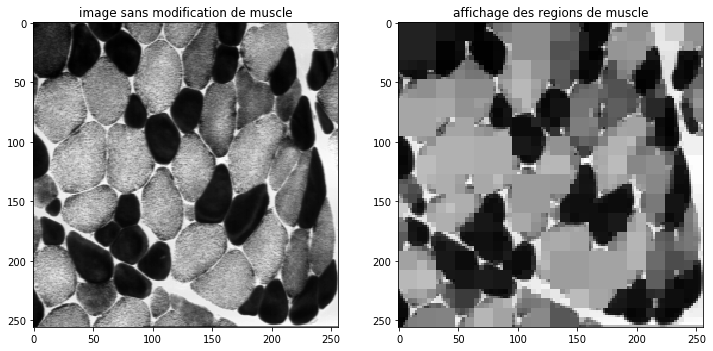

In [11]:
#Image muscle
m_muscle = result(muscle,25)
affichage_14([muscle,regions(m_muscle,muscle.shape)],['image sans modification de muscle','affichage des regions de muscle'])




coord (0, 0, 16, 16)
coord (0, 16, 16, 16)
coord (16, 0, 16, 16)
coord (16, 16, 8, 8)
coord (16, 24, 4, 4)
coord (16, 28, 2, 2)
coord (16, 30, 2, 2)
coord (18, 28, 2, 2)
coord (18, 30, 2, 2)
coord (20, 24, 4, 4)
coord (20, 28, 2, 2)
coord (20, 30, 2, 2)
coord (22, 28, 2, 2)
coord (22, 30, 2, 2)
coord (24, 16, 4, 4)
coord (24, 20, 4, 4)
coord (28, 16, 4, 4)
coord (28, 20, 4, 4)
coord (24, 24, 2, 2)
coord (24, 26, 2, 2)
coord (26, 24, 2, 2)
coord (26, 26, 2, 2)
coord (24, 28, 4, 4)
coord (28, 24, 2, 2)
coord (28, 26, 2, 2)
coord (30, 24, 2, 2)
coord (30, 26, 2, 2)
coord (28, 28, 4, 4)
coord (0, 32, 32, 32)
coord (32, 0, 8, 8)
coord (32, 8, 8, 8)
coord (40, 0, 8, 8)
coord (40, 8, 4, 4)
coord (40, 12, 2, 2)
coord (40, 14, 2, 2)
coord (42, 12, 2, 2)
coord (42, 14, 2, 2)
coord (44, 8, 4, 4)
coord (44, 12, 2, 2)
coord (44, 14, 2, 2)
coord (46, 12, 2, 2)
coord (46, 14, 2, 2)
coord (32, 16, 2, 2)
coord (32, 18, 2, 2)
coord (34, 16, 2, 2)
coord (34, 18, 2, 2)
coord (32, 20, 2, 2)
coord (32, 22, 

coord (70, 76, 2, 2)
coord (70, 78, 2, 2)
coord (72, 64, 8, 8)
coord (72, 72, 8, 8)
coord (64, 80, 16, 16)
coord (80, 64, 16, 16)
coord (80, 80, 2, 2)
coord (80, 82, 2, 2)
coord (82, 80, 2, 2)
coord (82, 82, 2, 2)
coord (80, 84, 2, 2)
coord (80, 86, 2, 2)
coord (82, 84, 2, 2)
coord (82, 86, 2, 2)
coord (84, 80, 2, 2)
coord (84, 82, 2, 2)
coord (86, 80, 2, 2)
coord (86, 82, 2, 2)
coord (84, 84, 2, 2)
coord (84, 86, 2, 2)
coord (86, 84, 2, 2)
coord (86, 86, 2, 2)
coord (80, 88, 8, 8)
coord (88, 80, 2, 2)
coord (88, 82, 2, 2)
coord (90, 80, 2, 2)
coord (90, 82, 2, 2)
coord (88, 84, 4, 4)
coord (92, 80, 2, 2)
coord (92, 82, 2, 2)
coord (94, 80, 2, 2)
coord (94, 82, 2, 2)
coord (92, 84, 4, 4)
coord (88, 88, 2, 2)
coord (88, 90, 2, 2)
coord (90, 88, 2, 2)
coord (90, 90, 2, 2)
coord (88, 92, 2, 2)
coord (88, 94, 2, 2)
coord (90, 92, 2, 2)
coord (90, 94, 2, 2)
coord (92, 88, 4, 4)
coord (92, 92, 4, 4)
coord (64, 96, 16, 16)
coord (64, 112, 4, 4)
coord (64, 116, 2, 2)
coord (64, 118, 2, 2)
coor

coord (96, 164, 4, 4)
coord (100, 160, 2, 2)
coord (100, 162, 2, 2)
coord (102, 160, 2, 2)
coord (102, 162, 2, 2)
coord (100, 164, 4, 4)
coord (96, 168, 8, 8)
coord (104, 160, 2, 2)
coord (104, 162, 2, 2)
coord (106, 160, 2, 2)
coord (106, 162, 2, 2)
coord (104, 164, 4, 4)
coord (108, 160, 2, 2)
coord (108, 162, 2, 2)
coord (110, 160, 2, 2)
coord (110, 162, 2, 2)
coord (108, 164, 4, 4)
coord (104, 168, 8, 8)
coord (96, 176, 16, 16)
coord (112, 160, 16, 16)
coord (112, 176, 8, 8)
coord (112, 184, 8, 8)
coord (120, 176, 8, 8)
coord (120, 184, 4, 4)
coord (120, 188, 2, 2)
coord (120, 190, 2, 2)
coord (122, 188, 2, 2)
coord (122, 190, 2, 2)
coord (124, 184, 4, 4)
coord (124, 188, 4, 4)
coord (64, 192, 8, 8)
coord (64, 200, 4, 4)
coord (64, 204, 2, 2)
coord (64, 206, 2, 2)
coord (66, 204, 2, 2)
coord (66, 206, 2, 2)
coord (68, 200, 4, 4)
coord (68, 204, 2, 2)
coord (68, 206, 2, 2)
coord (70, 204, 2, 2)
coord (70, 206, 2, 2)
coord (72, 192, 8, 8)
coord (72, 200, 4, 4)
coord (72, 204, 2, 2)
c

coord (216, 2, 2, 2)
coord (218, 0, 2, 2)
coord (218, 2, 2, 2)
coord (216, 4, 2, 2)
coord (216, 6, 2, 2)
coord (218, 4, 2, 2)
coord (218, 6, 2, 2)
coord (220, 0, 4, 4)
coord (220, 4, 4, 4)
coord (216, 8, 4, 4)
coord (216, 12, 2, 2)
coord (216, 14, 2, 2)
coord (218, 12, 2, 2)
coord (218, 14, 2, 2)
coord (220, 8, 2, 2)
coord (220, 10, 2, 2)
coord (222, 8, 2, 2)
coord (222, 10, 2, 2)
coord (220, 12, 2, 2)
coord (220, 14, 2, 2)
coord (222, 12, 2, 2)
coord (222, 14, 2, 2)
coord (208, 16, 8, 8)
coord (208, 24, 4, 4)
coord (208, 28, 4, 4)
coord (212, 24, 4, 4)
coord (212, 28, 4, 4)
coord (216, 16, 4, 4)
coord (216, 20, 4, 4)
coord (220, 16, 4, 4)
coord (220, 20, 4, 4)
coord (216, 24, 8, 8)
coord (192, 32, 32, 32)
coord (224, 0, 16, 16)
coord (224, 16, 4, 4)
coord (224, 20, 4, 4)
coord (228, 16, 4, 4)
coord (228, 20, 4, 4)
coord (224, 24, 8, 8)
coord (232, 16, 4, 4)
coord (232, 20, 4, 4)
coord (236, 16, 4, 4)
coord (236, 20, 4, 4)
coord (232, 24, 8, 8)
coord (240, 0, 16, 16)
coord (240, 16, 16

coord (24, 64, 2, 2)
coord (24, 66, 2, 2)
coord (26, 64, 2, 2)
coord (26, 66, 2, 2)
coord (24, 68, 2, 2)
coord (24, 70, 2, 2)
coord (26, 68, 2, 2)
coord (26, 70, 2, 2)
coord (28, 64, 4, 4)
coord (28, 68, 2, 2)
coord (28, 70, 2, 2)
coord (30, 68, 2, 2)
coord (30, 70, 2, 2)
coord (24, 72, 8, 8)
coord (16, 80, 16, 16)
coord (0, 96, 16, 16)
coord (0, 112, 8, 8)
coord (0, 120, 4, 4)
coord (0, 124, 4, 4)
coord (4, 120, 2, 2)
coord (4, 122, 2, 2)
coord (6, 120, 2, 2)
coord (6, 122, 2, 2)
coord (4, 124, 4, 4)
coord (8, 112, 4, 4)
coord (8, 116, 2, 2)
coord (8, 118, 2, 2)
coord (10, 116, 2, 2)
coord (10, 118, 2, 2)
coord (12, 112, 4, 4)
coord (12, 116, 2, 2)
coord (12, 118, 2, 2)
coord (14, 116, 2, 2)
coord (14, 118, 2, 2)
coord (8, 120, 2, 2)
coord (8, 122, 2, 2)
coord (10, 120, 2, 2)
coord (10, 122, 2, 2)
coord (8, 124, 4, 4)
coord (12, 120, 2, 2)
coord (12, 122, 2, 2)
coord (14, 120, 2, 2)
coord (14, 122, 2, 2)
coord (12, 124, 4, 4)
coord (16, 96, 16, 16)
coord (16, 112, 4, 4)
coord (16, 116

coord (80, 126, 2, 2)
coord (82, 124, 2, 2)
coord (82, 126, 2, 2)
coord (84, 120, 4, 4)
coord (84, 124, 4, 4)
coord (88, 112, 8, 8)
coord (88, 120, 2, 2)
coord (88, 122, 2, 2)
coord (90, 120, 2, 2)
coord (90, 122, 2, 2)
coord (88, 124, 2, 2)
coord (88, 126, 2, 2)
coord (90, 124, 2, 2)
coord (90, 126, 2, 2)
coord (92, 120, 2, 2)
coord (92, 122, 2, 2)
coord (94, 120, 2, 2)
coord (94, 122, 2, 2)
coord (92, 124, 2, 2)
coord (92, 126, 2, 2)
coord (94, 124, 2, 2)
coord (94, 126, 2, 2)
coord (96, 64, 16, 16)
coord (96, 80, 16, 16)
coord (112, 64, 4, 4)
coord (112, 68, 4, 4)
coord (116, 64, 2, 2)
coord (116, 66, 2, 2)
coord (118, 64, 2, 2)
coord (118, 66, 2, 2)
coord (116, 68, 2, 2)
coord (116, 70, 2, 2)
coord (118, 68, 2, 2)
coord (118, 70, 2, 2)
coord (112, 72, 4, 4)
coord (112, 76, 2, 2)
coord (112, 78, 2, 2)
coord (114, 76, 2, 2)
coord (114, 78, 2, 2)
coord (116, 72, 2, 2)
coord (116, 74, 2, 2)
coord (118, 72, 2, 2)
coord (118, 74, 2, 2)
coord (116, 76, 4, 4)
coord (120, 64, 8, 8)
coord (1

coord (88, 206, 2, 2)
coord (90, 204, 2, 2)
coord (90, 206, 2, 2)
coord (92, 200, 2, 2)
coord (92, 202, 2, 2)
coord (94, 200, 2, 2)
coord (94, 202, 2, 2)
coord (92, 204, 2, 2)
coord (92, 206, 2, 2)
coord (94, 204, 2, 2)
coord (94, 206, 2, 2)
coord (80, 208, 16, 16)
coord (64, 224, 16, 16)
coord (64, 240, 4, 4)
coord (64, 244, 4, 4)
coord (68, 240, 4, 4)
coord (68, 244, 4, 4)
coord (64, 248, 8, 8)
coord (72, 240, 4, 4)
coord (72, 244, 2, 2)
coord (72, 246, 2, 2)
coord (74, 244, 2, 2)
coord (74, 246, 2, 2)
coord (76, 240, 4, 4)
coord (76, 244, 2, 2)
coord (76, 246, 2, 2)
coord (78, 244, 2, 2)
coord (78, 246, 2, 2)
coord (72, 248, 8, 8)
coord (80, 224, 16, 16)
coord (80, 240, 4, 4)
coord (80, 244, 2, 2)
coord (80, 246, 2, 2)
coord (82, 244, 2, 2)
coord (82, 246, 2, 2)
coord (84, 240, 4, 4)
coord (84, 244, 4, 4)
coord (80, 248, 8, 8)
coord (88, 240, 4, 4)
coord (88, 244, 4, 4)
coord (92, 240, 4, 4)
coord (92, 244, 4, 4)
coord (88, 248, 8, 8)
coord (96, 192, 8, 8)
coord (96, 200, 4, 4)
coor

coord (240, 96, 16, 16)
coord (240, 112, 2, 2)
coord (240, 114, 2, 2)
coord (242, 112, 2, 2)
coord (242, 114, 2, 2)
coord (240, 116, 2, 2)
coord (240, 118, 2, 2)
coord (242, 116, 2, 2)
coord (242, 118, 2, 2)
coord (244, 112, 2, 2)
coord (244, 114, 2, 2)
coord (246, 112, 2, 2)
coord (246, 114, 2, 2)
coord (244, 116, 2, 2)
coord (244, 118, 2, 2)
coord (246, 116, 2, 2)
coord (246, 118, 2, 2)
coord (240, 120, 8, 8)
coord (248, 112, 4, 4)
coord (248, 116, 2, 2)
coord (248, 118, 2, 2)
coord (250, 116, 2, 2)
coord (250, 118, 2, 2)
coord (252, 112, 4, 4)
coord (252, 116, 4, 4)
coord (248, 120, 2, 2)
coord (248, 122, 2, 2)
coord (250, 120, 2, 2)
coord (250, 122, 2, 2)
coord (248, 124, 4, 4)
coord (252, 120, 2, 2)
coord (252, 122, 2, 2)
coord (254, 120, 2, 2)
coord (254, 122, 2, 2)
coord (252, 124, 4, 4)
coord (128, 128, 8, 8)
coord (128, 136, 8, 8)
coord (136, 128, 8, 8)
coord (136, 136, 8, 8)
coord (128, 144, 2, 2)
coord (128, 146, 2, 2)
coord (130, 144, 2, 2)
coord (130, 146, 2, 2)
coord (128

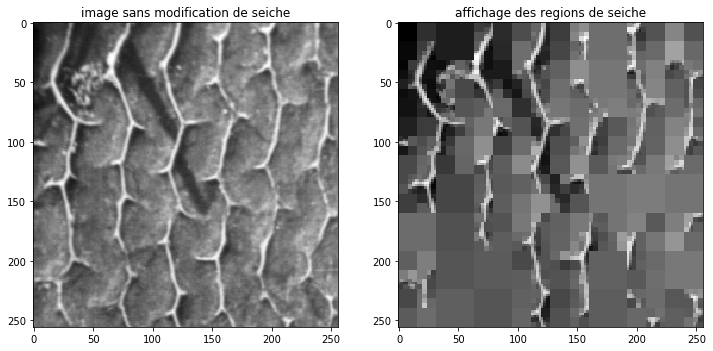

In [12]:
#Image seiche
m_seiche = result(seiche, 15)
affichage_14([seiche,regions(m_seiche,seiche.shape)],['image sans modification de seiche',
                                                      'affichage des regions de seiche'])




coord (0, 0, 8, 8)
coord (0, 8, 4, 4)
coord (0, 12, 2, 2)
coord (0, 14, 2, 2)
coord (2, 12, 2, 2)
coord (2, 14, 2, 2)
coord (4, 8, 4, 4)
coord (4, 12, 4, 4)
coord (8, 0, 8, 8)
coord (8, 8, 8, 8)
coord (0, 16, 2, 2)
coord (0, 18, 2, 2)
coord (2, 16, 2, 2)
coord (2, 18, 2, 2)
coord (0, 20, 4, 4)
coord (4, 16, 2, 2)
coord (4, 18, 2, 2)
coord (6, 16, 2, 2)
coord (6, 18, 2, 2)
coord (4, 20, 2, 2)
coord (4, 22, 2, 2)
coord (6, 20, 2, 2)
coord (6, 22, 2, 2)
coord (0, 24, 8, 8)
coord (8, 16, 4, 4)
coord (8, 20, 2, 2)
coord (8, 22, 2, 2)
coord (10, 20, 2, 2)
coord (10, 22, 2, 2)
coord (12, 16, 4, 4)
coord (12, 20, 4, 4)
coord (8, 24, 2, 2)
coord (8, 26, 2, 2)
coord (10, 24, 2, 2)
coord (10, 26, 2, 2)
coord (8, 28, 2, 2)
coord (8, 30, 2, 2)
coord (10, 28, 2, 2)
coord (10, 30, 2, 2)
coord (12, 24, 2, 2)
coord (12, 26, 2, 2)
coord (14, 24, 2, 2)
coord (14, 26, 2, 2)
coord (12, 28, 2, 2)
coord (12, 30, 2, 2)
coord (14, 28, 2, 2)
coord (14, 30, 2, 2)
coord (16, 0, 16, 16)
coord (16, 16, 16, 16)
coor

coord (66, 12, 2, 2)
coord (66, 14, 2, 2)
coord (68, 8, 4, 4)
coord (68, 12, 4, 4)
coord (72, 0, 8, 8)
coord (72, 8, 8, 8)
coord (64, 16, 2, 2)
coord (64, 18, 2, 2)
coord (66, 16, 2, 2)
coord (66, 18, 2, 2)
coord (64, 20, 2, 2)
coord (64, 22, 2, 2)
coord (66, 20, 2, 2)
coord (66, 22, 2, 2)
coord (68, 16, 2, 2)
coord (68, 18, 2, 2)
coord (70, 16, 2, 2)
coord (70, 18, 2, 2)
coord (68, 20, 2, 2)
coord (68, 22, 2, 2)
coord (70, 20, 2, 2)
coord (70, 22, 2, 2)
coord (64, 24, 2, 2)
coord (64, 26, 2, 2)
coord (66, 24, 2, 2)
coord (66, 26, 2, 2)
coord (64, 28, 2, 2)
coord (64, 30, 2, 2)
coord (66, 28, 2, 2)
coord (66, 30, 2, 2)
coord (68, 24, 2, 2)
coord (68, 26, 2, 2)
coord (70, 24, 2, 2)
coord (70, 26, 2, 2)
coord (68, 28, 2, 2)
coord (68, 30, 2, 2)
coord (70, 28, 2, 2)
coord (70, 30, 2, 2)
coord (72, 16, 2, 2)
coord (72, 18, 2, 2)
coord (74, 16, 2, 2)
coord (74, 18, 2, 2)
coord (72, 20, 2, 2)
coord (72, 22, 2, 2)
coord (74, 20, 2, 2)
coord (74, 22, 2, 2)
coord (76, 16, 2, 2)
coord (76, 18, 2

coord (126, 100, 2, 2)
coord (126, 102, 2, 2)
coord (120, 104, 2, 2)
coord (120, 106, 2, 2)
coord (122, 104, 2, 2)
coord (122, 106, 2, 2)
coord (120, 108, 4, 4)
coord (124, 104, 2, 2)
coord (124, 106, 2, 2)
coord (126, 104, 2, 2)
coord (126, 106, 2, 2)
coord (124, 108, 4, 4)
coord (112, 112, 8, 8)
coord (112, 120, 2, 2)
coord (112, 122, 2, 2)
coord (114, 120, 2, 2)
coord (114, 122, 2, 2)
coord (112, 124, 2, 2)
coord (112, 126, 2, 2)
coord (114, 124, 2, 2)
coord (114, 126, 2, 2)
coord (116, 120, 2, 2)
coord (116, 122, 2, 2)
coord (118, 120, 2, 2)
coord (118, 122, 2, 2)
coord (116, 124, 2, 2)
coord (116, 126, 2, 2)
coord (118, 124, 2, 2)
coord (118, 126, 2, 2)
coord (120, 112, 8, 8)
coord (120, 120, 4, 4)
coord (120, 124, 2, 2)
coord (120, 126, 2, 2)
coord (122, 124, 2, 2)
coord (122, 126, 2, 2)
coord (124, 120, 4, 4)
coord (124, 124, 4, 4)
coord (0, 128, 16, 16)
coord (0, 144, 8, 8)
coord (0, 152, 2, 2)
coord (0, 154, 2, 2)
coord (2, 152, 2, 2)
coord (2, 154, 2, 2)
coord (0, 156, 4, 4)


coord (50, 224, 2, 2)
coord (50, 226, 2, 2)
coord (48, 228, 2, 2)
coord (48, 230, 2, 2)
coord (50, 228, 2, 2)
coord (50, 230, 2, 2)
coord (52, 224, 4, 4)
coord (52, 228, 2, 2)
coord (52, 230, 2, 2)
coord (54, 228, 2, 2)
coord (54, 230, 2, 2)
coord (48, 232, 8, 8)
coord (56, 224, 4, 4)
coord (56, 228, 2, 2)
coord (56, 230, 2, 2)
coord (58, 228, 2, 2)
coord (58, 230, 2, 2)
coord (60, 224, 4, 4)
coord (60, 228, 2, 2)
coord (60, 230, 2, 2)
coord (62, 228, 2, 2)
coord (62, 230, 2, 2)
coord (56, 232, 2, 2)
coord (56, 234, 2, 2)
coord (58, 232, 2, 2)
coord (58, 234, 2, 2)
coord (56, 236, 4, 4)
coord (60, 232, 2, 2)
coord (60, 234, 2, 2)
coord (62, 232, 2, 2)
coord (62, 234, 2, 2)
coord (60, 236, 4, 4)
coord (48, 240, 8, 8)
coord (48, 248, 4, 4)
coord (48, 252, 2, 2)
coord (48, 254, 2, 2)
coord (50, 252, 2, 2)
coord (50, 254, 2, 2)
coord (52, 248, 4, 4)
coord (52, 252, 2, 2)
coord (52, 254, 2, 2)
coord (54, 252, 2, 2)
coord (54, 254, 2, 2)
coord (56, 240, 8, 8)
coord (56, 248, 4, 4)
coord (56,

coord (98, 230, 2, 2)
coord (100, 224, 4, 4)
coord (100, 228, 2, 2)
coord (100, 230, 2, 2)
coord (102, 228, 2, 2)
coord (102, 230, 2, 2)
coord (96, 232, 2, 2)
coord (96, 234, 2, 2)
coord (98, 232, 2, 2)
coord (98, 234, 2, 2)
coord (96, 236, 4, 4)
coord (100, 232, 2, 2)
coord (100, 234, 2, 2)
coord (102, 232, 2, 2)
coord (102, 234, 2, 2)
coord (100, 236, 4, 4)
coord (104, 224, 4, 4)
coord (104, 228, 2, 2)
coord (104, 230, 2, 2)
coord (106, 228, 2, 2)
coord (106, 230, 2, 2)
coord (108, 224, 4, 4)
coord (108, 228, 2, 2)
coord (108, 230, 2, 2)
coord (110, 228, 2, 2)
coord (110, 230, 2, 2)
coord (104, 232, 2, 2)
coord (104, 234, 2, 2)
coord (106, 232, 2, 2)
coord (106, 234, 2, 2)
coord (104, 236, 4, 4)
coord (108, 232, 2, 2)
coord (108, 234, 2, 2)
coord (110, 232, 2, 2)
coord (110, 234, 2, 2)
coord (108, 236, 4, 4)
coord (96, 240, 4, 4)
coord (96, 244, 2, 2)
coord (96, 246, 2, 2)
coord (98, 244, 2, 2)
coord (98, 246, 2, 2)
coord (100, 240, 4, 4)
coord (100, 244, 4, 4)
coord (96, 248, 2, 2)


coord (182, 92, 2, 2)
coord (182, 94, 2, 2)
coord (184, 80, 4, 4)
coord (184, 84, 2, 2)
coord (184, 86, 2, 2)
coord (186, 84, 2, 2)
coord (186, 86, 2, 2)
coord (188, 80, 2, 2)
coord (188, 82, 2, 2)
coord (190, 80, 2, 2)
coord (190, 82, 2, 2)
coord (188, 84, 2, 2)
coord (188, 86, 2, 2)
coord (190, 84, 2, 2)
coord (190, 86, 2, 2)
coord (184, 88, 2, 2)
coord (184, 90, 2, 2)
coord (186, 88, 2, 2)
coord (186, 90, 2, 2)
coord (184, 92, 2, 2)
coord (184, 94, 2, 2)
coord (186, 92, 2, 2)
coord (186, 94, 2, 2)
coord (188, 88, 2, 2)
coord (188, 90, 2, 2)
coord (190, 88, 2, 2)
coord (190, 90, 2, 2)
coord (188, 92, 2, 2)
coord (188, 94, 2, 2)
coord (190, 92, 2, 2)
coord (190, 94, 2, 2)
coord (160, 96, 8, 8)
coord (160, 104, 2, 2)
coord (160, 106, 2, 2)
coord (162, 104, 2, 2)
coord (162, 106, 2, 2)
coord (160, 108, 4, 4)
coord (164, 104, 2, 2)
coord (164, 106, 2, 2)
coord (166, 104, 2, 2)
coord (166, 106, 2, 2)
coord (164, 108, 4, 4)
coord (168, 96, 4, 4)
coord (168, 100, 2, 2)
coord (168, 102, 2, 2

coord (216, 112, 4, 4)
coord (216, 116, 4, 4)
coord (220, 112, 2, 2)
coord (220, 114, 2, 2)
coord (222, 112, 2, 2)
coord (222, 114, 2, 2)
coord (220, 116, 2, 2)
coord (220, 118, 2, 2)
coord (222, 116, 2, 2)
coord (222, 118, 2, 2)
coord (216, 120, 4, 4)
coord (216, 124, 4, 4)
coord (220, 120, 2, 2)
coord (220, 122, 2, 2)
coord (222, 120, 2, 2)
coord (222, 122, 2, 2)
coord (220, 124, 2, 2)
coord (220, 126, 2, 2)
coord (222, 124, 2, 2)
coord (222, 126, 2, 2)
coord (224, 64, 2, 2)
coord (224, 66, 2, 2)
coord (226, 64, 2, 2)
coord (226, 66, 2, 2)
coord (224, 68, 4, 4)
coord (228, 64, 2, 2)
coord (228, 66, 2, 2)
coord (230, 64, 2, 2)
coord (230, 66, 2, 2)
coord (228, 68, 2, 2)
coord (228, 70, 2, 2)
coord (230, 68, 2, 2)
coord (230, 70, 2, 2)
coord (224, 72, 4, 4)
coord (224, 76, 4, 4)
coord (228, 72, 2, 2)
coord (228, 74, 2, 2)
coord (230, 72, 2, 2)
coord (230, 74, 2, 2)
coord (228, 76, 2, 2)
coord (228, 78, 2, 2)
coord (230, 76, 2, 2)
coord (230, 78, 2, 2)
coord (232, 64, 2, 2)
coord (232, 

coord (140, 220, 2, 2)
coord (140, 222, 2, 2)
coord (142, 220, 2, 2)
coord (142, 222, 2, 2)
coord (144, 192, 16, 16)
coord (144, 208, 8, 8)
coord (144, 216, 4, 4)
coord (144, 220, 2, 2)
coord (144, 222, 2, 2)
coord (146, 220, 2, 2)
coord (146, 222, 2, 2)
coord (148, 216, 4, 4)
coord (148, 220, 2, 2)
coord (148, 222, 2, 2)
coord (150, 220, 2, 2)
coord (150, 222, 2, 2)
coord (152, 208, 8, 8)
coord (152, 216, 8, 8)
coord (128, 224, 16, 16)
coord (128, 240, 2, 2)
coord (128, 242, 2, 2)
coord (130, 240, 2, 2)
coord (130, 242, 2, 2)
coord (128, 244, 2, 2)
coord (128, 246, 2, 2)
coord (130, 244, 2, 2)
coord (130, 246, 2, 2)
coord (132, 240, 4, 4)
coord (132, 244, 4, 4)
coord (128, 248, 2, 2)
coord (128, 250, 2, 2)
coord (130, 248, 2, 2)
coord (130, 250, 2, 2)
coord (128, 252, 2, 2)
coord (128, 254, 2, 2)
coord (130, 252, 2, 2)
coord (130, 254, 2, 2)
coord (132, 248, 4, 4)
coord (132, 252, 2, 2)
coord (132, 254, 2, 2)
coord (134, 252, 2, 2)
coord (134, 254, 2, 2)
coord (136, 240, 8, 8)
coord (

coord (208, 216, 2, 2)
coord (208, 218, 2, 2)
coord (210, 216, 2, 2)
coord (210, 218, 2, 2)
coord (208, 220, 4, 4)
coord (212, 216, 4, 4)
coord (212, 220, 4, 4)
coord (216, 208, 8, 8)
coord (216, 216, 8, 8)
coord (192, 224, 2, 2)
coord (192, 226, 2, 2)
coord (194, 224, 2, 2)
coord (194, 226, 2, 2)
coord (192, 228, 2, 2)
coord (192, 230, 2, 2)
coord (194, 228, 2, 2)
coord (194, 230, 2, 2)
coord (196, 224, 2, 2)
coord (196, 226, 2, 2)
coord (198, 224, 2, 2)
coord (198, 226, 2, 2)
coord (196, 228, 2, 2)
coord (196, 230, 2, 2)
coord (198, 228, 2, 2)
coord (198, 230, 2, 2)
coord (192, 232, 8, 8)
coord (200, 224, 2, 2)
coord (200, 226, 2, 2)
coord (202, 224, 2, 2)
coord (202, 226, 2, 2)
coord (200, 228, 2, 2)
coord (200, 230, 2, 2)
coord (202, 228, 2, 2)
coord (202, 230, 2, 2)
coord (204, 224, 2, 2)
coord (204, 226, 2, 2)
coord (206, 224, 2, 2)
coord (206, 226, 2, 2)
coord (204, 228, 2, 2)
coord (204, 230, 2, 2)
coord (206, 228, 2, 2)
coord (206, 230, 2, 2)
coord (200, 232, 8, 8)
coord (192,

coord (42, 36, 2, 2)
coord (42, 38, 2, 2)
coord (44, 32, 2, 2)
coord (44, 34, 2, 2)
coord (46, 32, 2, 2)
coord (46, 34, 2, 2)
coord (44, 36, 2, 2)
coord (44, 38, 2, 2)
coord (46, 36, 2, 2)
coord (46, 38, 2, 2)
coord (40, 40, 8, 8)
coord (32, 48, 16, 16)
coord (48, 32, 4, 4)
coord (48, 36, 4, 4)
coord (52, 32, 2, 2)
coord (52, 34, 2, 2)
coord (54, 32, 2, 2)
coord (54, 34, 2, 2)
coord (52, 36, 2, 2)
coord (52, 38, 2, 2)
coord (54, 36, 2, 2)
coord (54, 38, 2, 2)
coord (48, 40, 8, 8)
coord (56, 32, 2, 2)
coord (56, 34, 2, 2)
coord (58, 32, 2, 2)
coord (58, 34, 2, 2)
coord (56, 36, 2, 2)
coord (56, 38, 2, 2)
coord (58, 36, 2, 2)
coord (58, 38, 2, 2)
coord (60, 32, 2, 2)
coord (60, 34, 2, 2)
coord (62, 32, 2, 2)
coord (62, 34, 2, 2)
coord (60, 36, 2, 2)
coord (60, 38, 2, 2)
coord (62, 36, 2, 2)
coord (62, 38, 2, 2)
coord (56, 40, 4, 4)
coord (56, 44, 4, 4)
coord (60, 40, 2, 2)
coord (60, 42, 2, 2)
coord (62, 40, 2, 2)
coord (62, 42, 2, 2)
coord (60, 44, 2, 2)
coord (60, 46, 2, 2)
coord (62, 

coord (68, 22, 2, 2)
coord (70, 20, 2, 2)
coord (70, 22, 2, 2)
coord (64, 24, 2, 2)
coord (64, 26, 2, 2)
coord (66, 24, 2, 2)
coord (66, 26, 2, 2)
coord (64, 28, 2, 2)
coord (64, 30, 2, 2)
coord (66, 28, 2, 2)
coord (66, 30, 2, 2)
coord (68, 24, 2, 2)
coord (68, 26, 2, 2)
coord (70, 24, 2, 2)
coord (70, 26, 2, 2)
coord (68, 28, 2, 2)
coord (68, 30, 2, 2)
coord (70, 28, 2, 2)
coord (70, 30, 2, 2)
coord (72, 16, 2, 2)
coord (72, 18, 2, 2)
coord (74, 16, 2, 2)
coord (74, 18, 2, 2)
coord (72, 20, 2, 2)
coord (72, 22, 2, 2)
coord (74, 20, 2, 2)
coord (74, 22, 2, 2)
coord (76, 16, 2, 2)
coord (76, 18, 2, 2)
coord (78, 16, 2, 2)
coord (78, 18, 2, 2)
coord (76, 20, 2, 2)
coord (76, 22, 2, 2)
coord (78, 20, 2, 2)
coord (78, 22, 2, 2)
coord (72, 24, 8, 8)
coord (80, 0, 8, 8)
coord (80, 8, 4, 4)
coord (80, 12, 2, 2)
coord (80, 14, 2, 2)
coord (82, 12, 2, 2)
coord (82, 14, 2, 2)
coord (84, 8, 4, 4)
coord (84, 12, 2, 2)
coord (84, 14, 2, 2)
coord (86, 12, 2, 2)
coord (86, 14, 2, 2)
coord (88, 0, 8,

coord (76, 104, 2, 2)
coord (76, 106, 2, 2)
coord (78, 104, 2, 2)
coord (78, 106, 2, 2)
coord (76, 108, 2, 2)
coord (76, 110, 2, 2)
coord (78, 108, 2, 2)
coord (78, 110, 2, 2)
coord (64, 112, 2, 2)
coord (64, 114, 2, 2)
coord (66, 112, 2, 2)
coord (66, 114, 2, 2)
coord (64, 116, 2, 2)
coord (64, 118, 2, 2)
coord (66, 116, 2, 2)
coord (66, 118, 2, 2)
coord (68, 112, 4, 4)
coord (68, 116, 2, 2)
coord (68, 118, 2, 2)
coord (70, 116, 2, 2)
coord (70, 118, 2, 2)
coord (64, 120, 4, 4)
coord (64, 124, 2, 2)
coord (64, 126, 2, 2)
coord (66, 124, 2, 2)
coord (66, 126, 2, 2)
coord (68, 120, 2, 2)
coord (68, 122, 2, 2)
coord (70, 120, 2, 2)
coord (70, 122, 2, 2)
coord (68, 124, 2, 2)
coord (68, 126, 2, 2)
coord (70, 124, 2, 2)
coord (70, 126, 2, 2)
coord (72, 112, 4, 4)
coord (72, 116, 2, 2)
coord (72, 118, 2, 2)
coord (74, 116, 2, 2)
coord (74, 118, 2, 2)
coord (76, 112, 4, 4)
coord (76, 116, 2, 2)
coord (76, 118, 2, 2)
coord (78, 116, 2, 2)
coord (78, 118, 2, 2)
coord (72, 120, 8, 8)
coord (80,

coord (24, 162, 2, 2)
coord (26, 160, 2, 2)
coord (26, 162, 2, 2)
coord (24, 164, 2, 2)
coord (24, 166, 2, 2)
coord (26, 164, 2, 2)
coord (26, 166, 2, 2)
coord (28, 160, 4, 4)
coord (28, 164, 2, 2)
coord (28, 166, 2, 2)
coord (30, 164, 2, 2)
coord (30, 166, 2, 2)
coord (24, 168, 2, 2)
coord (24, 170, 2, 2)
coord (26, 168, 2, 2)
coord (26, 170, 2, 2)
coord (24, 172, 4, 4)
coord (28, 168, 2, 2)
coord (28, 170, 2, 2)
coord (30, 168, 2, 2)
coord (30, 170, 2, 2)
coord (28, 172, 4, 4)
coord (16, 176, 2, 2)
coord (16, 178, 2, 2)
coord (18, 176, 2, 2)
coord (18, 178, 2, 2)
coord (16, 180, 4, 4)
coord (20, 176, 4, 4)
coord (20, 180, 4, 4)
coord (16, 184, 2, 2)
coord (16, 186, 2, 2)
coord (18, 184, 2, 2)
coord (18, 186, 2, 2)
coord (16, 188, 2, 2)
coord (16, 190, 2, 2)
coord (18, 188, 2, 2)
coord (18, 190, 2, 2)
coord (20, 184, 2, 2)
coord (20, 186, 2, 2)
coord (22, 184, 2, 2)
coord (22, 186, 2, 2)
coord (20, 188, 2, 2)
coord (20, 190, 2, 2)
coord (22, 188, 2, 2)
coord (22, 190, 2, 2)
coord (24,

coord (40, 230, 2, 2)
coord (42, 228, 2, 2)
coord (42, 230, 2, 2)
coord (44, 224, 2, 2)
coord (44, 226, 2, 2)
coord (46, 224, 2, 2)
coord (46, 226, 2, 2)
coord (44, 228, 2, 2)
coord (44, 230, 2, 2)
coord (46, 228, 2, 2)
coord (46, 230, 2, 2)
coord (40, 232, 2, 2)
coord (40, 234, 2, 2)
coord (42, 232, 2, 2)
coord (42, 234, 2, 2)
coord (40, 236, 2, 2)
coord (40, 238, 2, 2)
coord (42, 236, 2, 2)
coord (42, 238, 2, 2)
coord (44, 232, 2, 2)
coord (44, 234, 2, 2)
coord (46, 232, 2, 2)
coord (46, 234, 2, 2)
coord (44, 236, 4, 4)
coord (32, 240, 4, 4)
coord (32, 244, 4, 4)
coord (36, 240, 2, 2)
coord (36, 242, 2, 2)
coord (38, 240, 2, 2)
coord (38, 242, 2, 2)
coord (36, 244, 2, 2)
coord (36, 246, 2, 2)
coord (38, 244, 2, 2)
coord (38, 246, 2, 2)
coord (32, 248, 8, 8)
coord (40, 240, 2, 2)
coord (40, 242, 2, 2)
coord (42, 240, 2, 2)
coord (42, 242, 2, 2)
coord (40, 244, 2, 2)
coord (40, 246, 2, 2)
coord (42, 244, 2, 2)
coord (42, 246, 2, 2)
coord (44, 240, 4, 4)
coord (44, 244, 2, 2)
coord (44,

coord (110, 178, 2, 2)
coord (108, 180, 2, 2)
coord (108, 182, 2, 2)
coord (110, 180, 2, 2)
coord (110, 182, 2, 2)
coord (104, 184, 4, 4)
coord (104, 188, 4, 4)
coord (108, 184, 2, 2)
coord (108, 186, 2, 2)
coord (110, 184, 2, 2)
coord (110, 186, 2, 2)
coord (108, 188, 4, 4)
coord (112, 160, 2, 2)
coord (112, 162, 2, 2)
coord (114, 160, 2, 2)
coord (114, 162, 2, 2)
coord (112, 164, 2, 2)
coord (112, 166, 2, 2)
coord (114, 164, 2, 2)
coord (114, 166, 2, 2)
coord (116, 160, 4, 4)
coord (116, 164, 2, 2)
coord (116, 166, 2, 2)
coord (118, 164, 2, 2)
coord (118, 166, 2, 2)
coord (112, 168, 2, 2)
coord (112, 170, 2, 2)
coord (114, 168, 2, 2)
coord (114, 170, 2, 2)
coord (112, 172, 4, 4)
coord (116, 168, 2, 2)
coord (116, 170, 2, 2)
coord (118, 168, 2, 2)
coord (118, 170, 2, 2)
coord (116, 172, 4, 4)
coord (120, 160, 8, 8)
coord (120, 168, 2, 2)
coord (120, 170, 2, 2)
coord (122, 168, 2, 2)
coord (122, 170, 2, 2)
coord (120, 172, 2, 2)
coord (120, 174, 2, 2)
coord (122, 172, 2, 2)
coord (122,

coord (132, 28, 2, 2)
coord (132, 30, 2, 2)
coord (134, 28, 2, 2)
coord (134, 30, 2, 2)
coord (136, 16, 8, 8)
coord (136, 24, 2, 2)
coord (136, 26, 2, 2)
coord (138, 24, 2, 2)
coord (138, 26, 2, 2)
coord (136, 28, 2, 2)
coord (136, 30, 2, 2)
coord (138, 28, 2, 2)
coord (138, 30, 2, 2)
coord (140, 24, 4, 4)
coord (140, 28, 2, 2)
coord (140, 30, 2, 2)
coord (142, 28, 2, 2)
coord (142, 30, 2, 2)
coord (144, 0, 2, 2)
coord (144, 2, 2, 2)
coord (146, 0, 2, 2)
coord (146, 2, 2, 2)
coord (144, 4, 2, 2)
coord (144, 6, 2, 2)
coord (146, 4, 2, 2)
coord (146, 6, 2, 2)
coord (148, 0, 2, 2)
coord (148, 2, 2, 2)
coord (150, 0, 2, 2)
coord (150, 2, 2, 2)
coord (148, 4, 2, 2)
coord (148, 6, 2, 2)
coord (150, 4, 2, 2)
coord (150, 6, 2, 2)
coord (144, 8, 4, 4)
coord (144, 12, 4, 4)
coord (148, 8, 2, 2)
coord (148, 10, 2, 2)
coord (150, 8, 2, 2)
coord (150, 10, 2, 2)
coord (148, 12, 4, 4)
coord (152, 0, 2, 2)
coord (152, 2, 2, 2)
coord (154, 0, 2, 2)
coord (154, 2, 2, 2)
coord (152, 4, 2, 2)
coord (152, 

coord (144, 106, 2, 2)
coord (146, 104, 2, 2)
coord (146, 106, 2, 2)
coord (144, 108, 4, 4)
coord (148, 104, 2, 2)
coord (148, 106, 2, 2)
coord (150, 104, 2, 2)
coord (150, 106, 2, 2)
coord (148, 108, 4, 4)
coord (152, 96, 8, 8)
coord (152, 104, 2, 2)
coord (152, 106, 2, 2)
coord (154, 104, 2, 2)
coord (154, 106, 2, 2)
coord (152, 108, 4, 4)
coord (156, 104, 2, 2)
coord (156, 106, 2, 2)
coord (158, 104, 2, 2)
coord (158, 106, 2, 2)
coord (156, 108, 4, 4)
coord (144, 112, 16, 16)
coord (160, 64, 16, 16)
coord (160, 80, 16, 16)
coord (176, 64, 2, 2)
coord (176, 66, 2, 2)
coord (178, 64, 2, 2)
coord (178, 66, 2, 2)
coord (176, 68, 4, 4)
coord (180, 64, 2, 2)
coord (180, 66, 2, 2)
coord (182, 64, 2, 2)
coord (182, 66, 2, 2)
coord (180, 68, 2, 2)
coord (180, 70, 2, 2)
coord (182, 68, 2, 2)
coord (182, 70, 2, 2)
coord (176, 72, 8, 8)
coord (184, 64, 4, 4)
coord (184, 68, 2, 2)
coord (184, 70, 2, 2)
coord (186, 68, 2, 2)
coord (186, 70, 2, 2)
coord (188, 64, 4, 4)
coord (188, 68, 2, 2)
coord 

coord (244, 26, 2, 2)
coord (246, 24, 2, 2)
coord (246, 26, 2, 2)
coord (244, 28, 2, 2)
coord (244, 30, 2, 2)
coord (246, 28, 2, 2)
coord (246, 30, 2, 2)
coord (248, 16, 2, 2)
coord (248, 18, 2, 2)
coord (250, 16, 2, 2)
coord (250, 18, 2, 2)
coord (248, 20, 2, 2)
coord (248, 22, 2, 2)
coord (250, 20, 2, 2)
coord (250, 22, 2, 2)
coord (252, 16, 4, 4)
coord (252, 20, 4, 4)
coord (248, 24, 2, 2)
coord (248, 26, 2, 2)
coord (250, 24, 2, 2)
coord (250, 26, 2, 2)
coord (248, 28, 2, 2)
coord (248, 30, 2, 2)
coord (250, 28, 2, 2)
coord (250, 30, 2, 2)
coord (252, 24, 4, 4)
coord (252, 28, 4, 4)
coord (224, 32, 16, 16)
coord (224, 48, 8, 8)
coord (224, 56, 4, 4)
coord (224, 60, 2, 2)
coord (224, 62, 2, 2)
coord (226, 60, 2, 2)
coord (226, 62, 2, 2)
coord (228, 56, 4, 4)
coord (228, 60, 2, 2)
coord (228, 62, 2, 2)
coord (230, 60, 2, 2)
coord (230, 62, 2, 2)
coord (232, 48, 4, 4)
coord (232, 52, 4, 4)
coord (236, 48, 2, 2)
coord (236, 50, 2, 2)
coord (238, 48, 2, 2)
coord (238, 50, 2, 2)
coord (2

coord (132, 132, 2, 2)
coord (132, 134, 2, 2)
coord (134, 132, 2, 2)
coord (134, 134, 2, 2)
coord (128, 136, 2, 2)
coord (128, 138, 2, 2)
coord (130, 136, 2, 2)
coord (130, 138, 2, 2)
coord (128, 140, 2, 2)
coord (128, 142, 2, 2)
coord (130, 140, 2, 2)
coord (130, 142, 2, 2)
coord (132, 136, 2, 2)
coord (132, 138, 2, 2)
coord (134, 136, 2, 2)
coord (134, 138, 2, 2)
coord (132, 140, 2, 2)
coord (132, 142, 2, 2)
coord (134, 140, 2, 2)
coord (134, 142, 2, 2)
coord (136, 128, 2, 2)
coord (136, 130, 2, 2)
coord (138, 128, 2, 2)
coord (138, 130, 2, 2)
coord (136, 132, 4, 4)
coord (140, 128, 2, 2)
coord (140, 130, 2, 2)
coord (142, 128, 2, 2)
coord (142, 130, 2, 2)
coord (140, 132, 4, 4)
coord (136, 136, 4, 4)
coord (136, 140, 2, 2)
coord (136, 142, 2, 2)
coord (138, 140, 2, 2)
coord (138, 142, 2, 2)
coord (140, 136, 4, 4)
coord (140, 140, 4, 4)
coord (128, 144, 2, 2)
coord (128, 146, 2, 2)
coord (130, 144, 2, 2)
coord (130, 146, 2, 2)
coord (128, 148, 4, 4)
coord (132, 144, 2, 2)
coord (132,

coord (128, 196, 2, 2)
coord (128, 198, 2, 2)
coord (130, 196, 2, 2)
coord (130, 198, 2, 2)
coord (132, 192, 4, 4)
coord (132, 196, 4, 4)
coord (128, 200, 2, 2)
coord (128, 202, 2, 2)
coord (130, 200, 2, 2)
coord (130, 202, 2, 2)
coord (128, 204, 2, 2)
coord (128, 206, 2, 2)
coord (130, 204, 2, 2)
coord (130, 206, 2, 2)
coord (132, 200, 4, 4)
coord (132, 204, 2, 2)
coord (132, 206, 2, 2)
coord (134, 204, 2, 2)
coord (134, 206, 2, 2)
coord (136, 192, 8, 8)
coord (136, 200, 8, 8)
coord (128, 208, 2, 2)
coord (128, 210, 2, 2)
coord (130, 208, 2, 2)
coord (130, 210, 2, 2)
coord (128, 212, 2, 2)
coord (128, 214, 2, 2)
coord (130, 212, 2, 2)
coord (130, 214, 2, 2)
coord (132, 208, 2, 2)
coord (132, 210, 2, 2)
coord (134, 208, 2, 2)
coord (134, 210, 2, 2)
coord (132, 212, 2, 2)
coord (132, 214, 2, 2)
coord (134, 212, 2, 2)
coord (134, 214, 2, 2)
coord (128, 216, 2, 2)
coord (128, 218, 2, 2)
coord (130, 216, 2, 2)
coord (130, 218, 2, 2)
coord (128, 220, 2, 2)
coord (128, 222, 2, 2)
coord (130,

coord (236, 144, 2, 2)
coord (236, 146, 2, 2)
coord (238, 144, 2, 2)
coord (238, 146, 2, 2)
coord (236, 148, 4, 4)
coord (232, 152, 2, 2)
coord (232, 154, 2, 2)
coord (234, 152, 2, 2)
coord (234, 154, 2, 2)
coord (232, 156, 2, 2)
coord (232, 158, 2, 2)
coord (234, 156, 2, 2)
coord (234, 158, 2, 2)
coord (236, 152, 4, 4)
coord (236, 156, 2, 2)
coord (236, 158, 2, 2)
coord (238, 156, 2, 2)
coord (238, 158, 2, 2)
coord (240, 128, 16, 16)
coord (240, 144, 2, 2)
coord (240, 146, 2, 2)
coord (242, 144, 2, 2)
coord (242, 146, 2, 2)
coord (240, 148, 2, 2)
coord (240, 150, 2, 2)
coord (242, 148, 2, 2)
coord (242, 150, 2, 2)
coord (244, 144, 2, 2)
coord (244, 146, 2, 2)
coord (246, 144, 2, 2)
coord (246, 146, 2, 2)
coord (244, 148, 2, 2)
coord (244, 150, 2, 2)
coord (246, 148, 2, 2)
coord (246, 150, 2, 2)
coord (240, 152, 2, 2)
coord (240, 154, 2, 2)
coord (242, 152, 2, 2)
coord (242, 154, 2, 2)
coord (240, 156, 2, 2)
coord (240, 158, 2, 2)
coord (242, 156, 2, 2)
coord (242, 158, 2, 2)
coord (24

coord (254, 196, 2, 2)
coord (254, 198, 2, 2)
coord (248, 200, 4, 4)
coord (248, 204, 4, 4)
coord (252, 200, 2, 2)
coord (252, 202, 2, 2)
coord (254, 200, 2, 2)
coord (254, 202, 2, 2)
coord (252, 204, 4, 4)
coord (240, 208, 16, 16)
coord (224, 224, 16, 16)
coord (224, 240, 2, 2)
coord (224, 242, 2, 2)
coord (226, 240, 2, 2)
coord (226, 242, 2, 2)
coord (224, 244, 2, 2)
coord (224, 246, 2, 2)
coord (226, 244, 2, 2)
coord (226, 246, 2, 2)
coord (228, 240, 4, 4)
coord (228, 244, 2, 2)
coord (228, 246, 2, 2)
coord (230, 244, 2, 2)
coord (230, 246, 2, 2)
coord (224, 248, 2, 2)
coord (224, 250, 2, 2)
coord (226, 248, 2, 2)
coord (226, 250, 2, 2)
coord (224, 252, 4, 4)
coord (228, 248, 2, 2)
coord (228, 250, 2, 2)
coord (230, 248, 2, 2)
coord (230, 250, 2, 2)
coord (228, 252, 4, 4)
coord (232, 240, 4, 4)
coord (232, 244, 2, 2)
coord (232, 246, 2, 2)
coord (234, 244, 2, 2)
coord (234, 246, 2, 2)
coord (236, 240, 4, 4)
coord (236, 244, 4, 4)
coord (232, 248, 2, 2)
coord (232, 250, 2, 2)
coord (

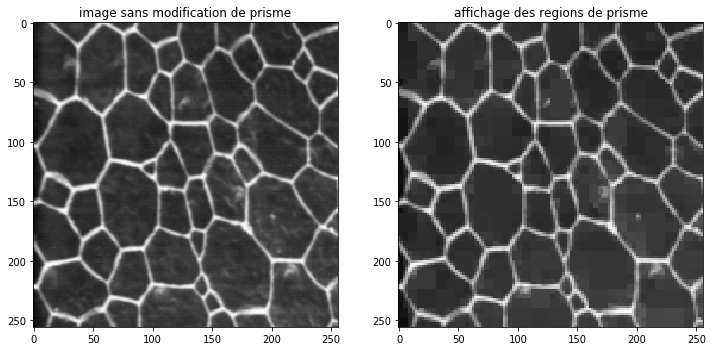

In [13]:
#Image prisme
m_prisme = result(prisme,9)
affichage_14([prisme,regions(m_prisme,prisme.shape)],['image sans modification de prisme',
                                                      'affichage des regions de prisme'])




### Question 2 (bonus):
Utiliser un critère de découpage alternatif, par exemple celui proposé en cours: on fusionne qui la variance de la région fusionné est plus petite que celle de la région non fusionnée. Tester sur les images.

### Question 3 (bonus):
La fusion dépend de la façon dont on visite les régions. On peut alors faire un tri des feuilles de l'arbre 4-aire, par exemple, des blocs les plus gros aux plus petits, ou le contraire (utiliser la fonction Python ``sorted()``). La même question peut se poser lorsqu'on calcule l'ensemble des voisins de la région que l'on fusionne. Faut-il les trier ? Si oui, selon quel critère ? leur taille ? leur proximité ? Evidemment il n'y a pas de réponse universelle mais adaptée à chaque type de problème. Faites quelques tests pour voir l'influence de ces tris sur le résultat de la fusion.